# America Company Bankrupt Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.feature_selection     import SelectKBest, f_classif
from feature_engine.outliers       import Winsorizer
from sklearn.model_selection       import train_test_split
from sklearn.preprocessing         import MinMaxScaler, StandardScaler
from sklearn.preprocessing         import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline              import make_pipeline
from sklearn.compose               import ColumnTransformer
from sklearn.metrics               import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from pyforest                      import *

In [3]:
df = pd.read_csv('C:/Users/ASUS/kode/Projek/bankrupt/american_bankruptcy.csv')
df

<IPython.core.display.Javascript object>

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [4]:
df.rename(columns={
    'company_name': 'nama_perusahaan',
    'X1':'aset_sekarang',
    'X2':'biaya_barang_terjual',
    'X3':'penyusutan_dan_amortisasi',
    'X4':'laba_spbda',
    'X5':'inventaris',
    'X6':'pendapatan_bersih',
    'X7':'total_piutang',
    'X8':'nilai_pasar',
    'X9':'penjualan_bersih',
    'X10':'total_aset',
    'X11':'total_hutang_jangka_panjang',
    'X12':'laba_sbpb',
    'X13':'laba_kotor',
    'X14':'total_kewajiban lancar',
    'X15':'laba_tersisa',
    'X16':'total_pendapatan',
    'X17':'total_hutang',
    'X18':'total_biaya_operasional'}, inplace=True)

In [5]:
df.head(5)

,nama_perusahaan,status_label,year,aset_sekarang,biaya_barang_terjual,penyusutan_dan_amortisasi,laba_spbda,inventaris,pendapatan_bersih,total_piutang,...,penjualan_bersih,total_aset,total_hutang_jangka_panjang,laba_sbpb,laba_kotor,total_kewajiban lancar,laba_tersisa,total_pendapatan,total_hutang,total_biaya_operasional
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nama_perusahaan              78682 non-null  object 
 1   status_label                 78682 non-null  object 
 2   year                         78682 non-null  int64  
 3   aset_sekarang                78682 non-null  float64
 4   biaya_barang_terjual         78682 non-null  float64
 5   penyusutan_dan_amortisasi    78682 non-null  float64
 6   laba_spbda                   78682 non-null  float64
 7   inventaris                   78682 non-null  float64
 8   pendapatan_bersih            78682 non-null  float64
 9   total_piutang                78682 non-null  float64
 10  nilai_pasar                  78682 non-null  float64
 11  penjualan_bersih             78682 non-null  float64
 12  total_aset                   78682 non-null  float64
 13  total_hutang_jan

In [7]:
df['status_label'].unique()

array(['alive', 'failed'], dtype=object)

### Data Cleaning

In [8]:
# replace jadi boolean aja, 0 = alive, 1 = failed/bankrupt

df['status_label'] = df['status_label'].apply(lambda x: 0 if x=='alive' else 1)
df = df.rename(columns={'status_label':'bankrupt'})

In [9]:
df.head(3)

,nama_perusahaan,bankrupt,year,aset_sekarang,biaya_barang_terjual,penyusutan_dan_amortisasi,laba_spbda,inventaris,pendapatan_bersih,total_piutang,...,penjualan_bersih,total_aset,total_hutang_jangka_panjang,laba_sbpb,laba_kotor,total_kewajiban lancar,laba_tersisa,total_pendapatan,total_hutang,total_biaya_operasional
0,C_1,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514


In [10]:
df.columns

Index(['nama_perusahaan', 'bankrupt', 'year', 'aset_sekarang',
       'biaya_barang_terjual', 'penyusutan_dan_amortisasi', 'laba_spbda',
       'inventaris', 'pendapatan_bersih', 'total_piutang', 'nilai_pasar',
       'penjualan_bersih', 'total_aset', 'total_hutang_jangka_panjang',
       'laba_sbpb', 'laba_kotor', 'total_kewajiban lancar', 'laba_tersisa',
       'total_pendapatan', 'total_hutang', 'total_biaya_operasional'],
      dtype='object')

In [11]:
df['bankrupt'].value_counts()

bankrupt
0    73462
1     5220
Name: count, dtype: int64

In [12]:
df['bankrupt'].value_counts(normalize=True)

bankrupt
0    0.933657
1    0.066343
Name: proportion, dtype: float64

93% data point itu memiliki label bankrupt 0 atau tidak bankrut, sedangkan 1 itu artinya bankrut.

#### Missing Values

In [13]:
df.isnull().sum()

nama_perusahaan                0
bankrupt                       0
year                           0
aset_sekarang                  0
biaya_barang_terjual           0
penyusutan_dan_amortisasi      0
laba_spbda                     0
inventaris                     0
pendapatan_bersih              0
total_piutang                  0
nilai_pasar                    0
penjualan_bersih               0
total_aset                     0
total_hutang_jangka_panjang    0
laba_sbpb                      0
laba_kotor                     0
total_kewajiban lancar         0
laba_tersisa                   0
total_pendapatan               0
total_hutang                   0
total_biaya_operasional        0
dtype: int64

In [14]:
df.describe()

,bankrupt,year,aset_sekarang,biaya_barang_terjual,penyusutan_dan_amortisasi,laba_spbda,inventaris,pendapatan_bersih,total_piutang,nilai_pasar,penjualan_bersih,total_aset,total_hutang_jangka_panjang,laba_sbpb,laba_kotor,total_kewajiban lancar,laba_tersisa,total_pendapatan,total_hutang,total_biaya_operasional
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,0.066343,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,0.248882,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,0.000000,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,0.000000,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,0.000000,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,0.000000,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,1.000000,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [15]:
# mungkin nama_perusahaan itu seperti unik

df2 = df.copy()
df2 = df2.drop(columns=['nama_perusahaan'], axis=1)
df2

,bankrupt,year,aset_sekarang,biaya_barang_terjual,penyusutan_dan_amortisasi,laba_spbda,inventaris,pendapatan_bersih,total_piutang,nilai_pasar,penjualan_bersih,total_aset,total_hutang_jangka_panjang,laba_sbpb,laba_kotor,total_kewajiban lancar,laba_tersisa,total_pendapatan,total_hutang,total_biaya_operasional
0,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,0,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,0,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,0,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,756.4827,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,0,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,527.5750,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,0,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,578.8868,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,0,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,412.6241,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


#### Outlier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

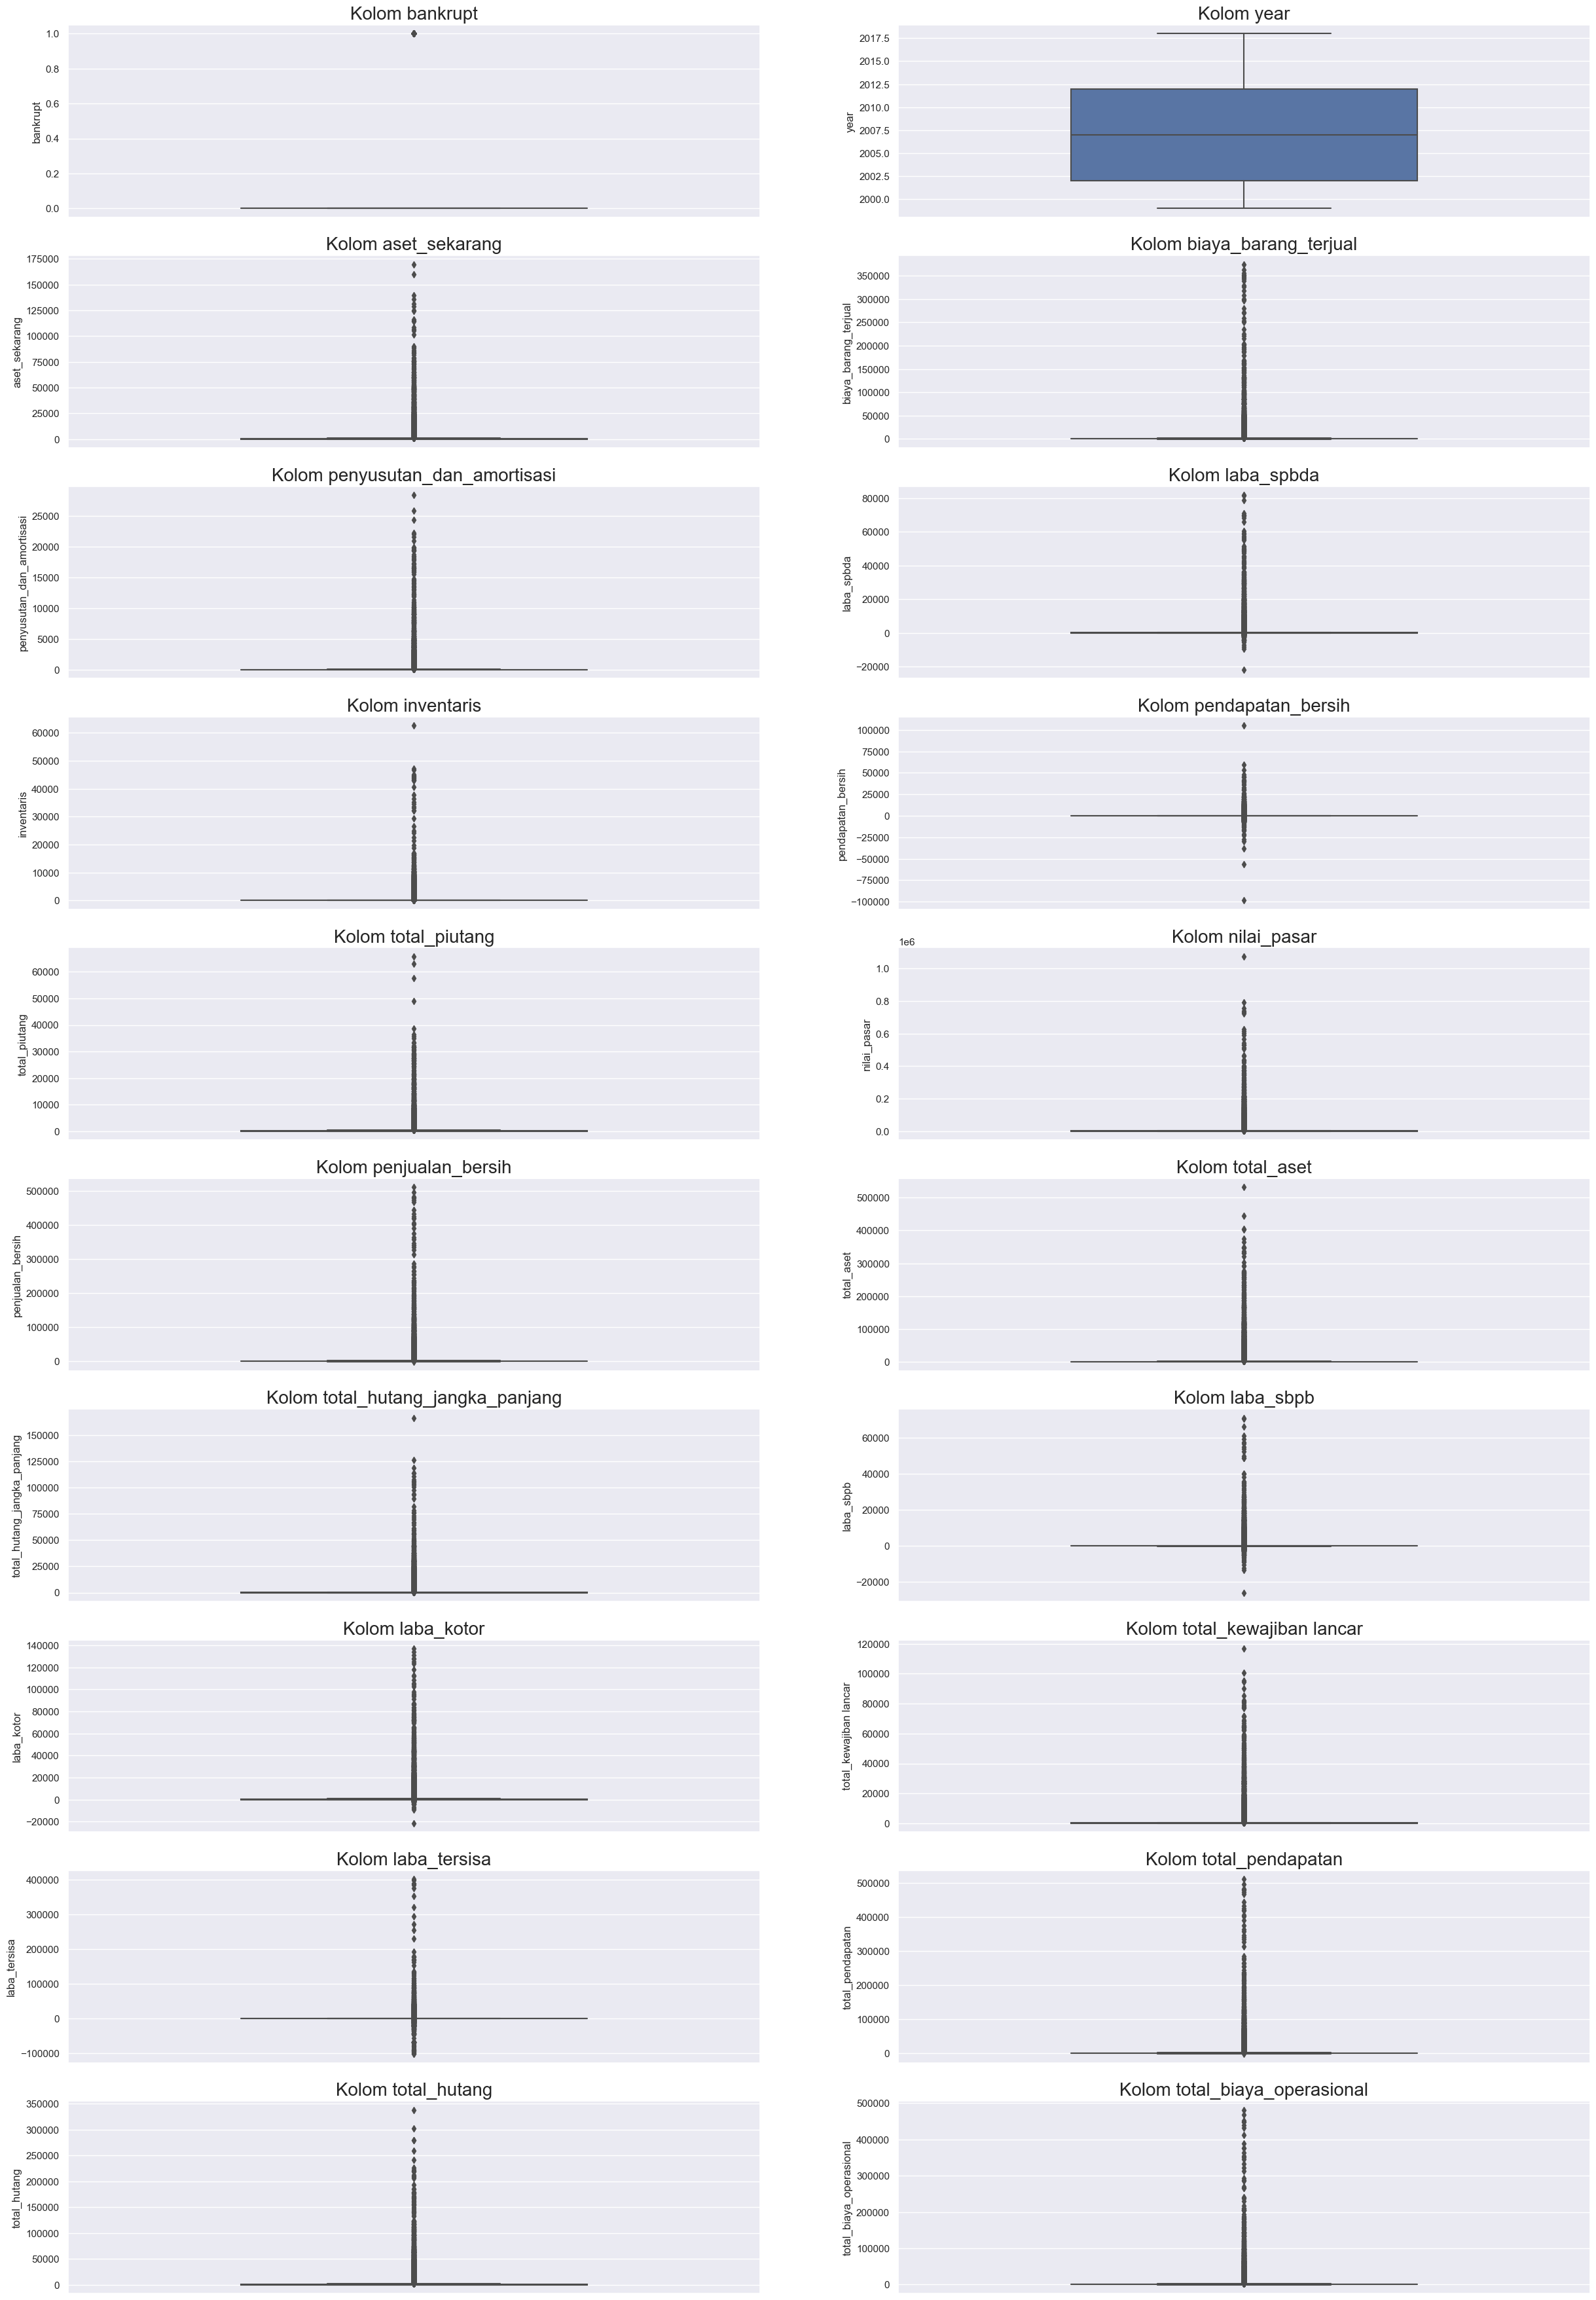

In [16]:
num                = df2
n                  = len(num.columns)
rows               = n // 2
cols               = 2
sns.set(font_scale = 1)
fig, ax            = plt.subplots(rows, cols, figsize=(30, 45))

for i in range(rows):
    
    for j in range(cols):
        
        index      = i * cols + j
        if index   < n:
            col    = num.columns[index]
            sns.boxplot(ax=ax[i, j],
                        data=num,
                        y=num[col],
                        width=0.50)
            
            ax[i, j].set_title(f'Kolom {col}', fontdict={'fontsize': 20})

terlihat banyak sekali outlier pada seluruh fitur numerikal tersebut. hal ini menjadi tantangan dan pertanyaan apakah diperlukan untuk menerapkan handling outlier contohnya dengan IQR? namun hampir seluruh datanya itu outlier.

#### Buktikan terlebih dahulu
Teknik visualisasi terbaik untuk membuktikan apakah benar jika outlier dihapus maka data dengan variabel target bankrupt = 1 akan hilang? atau sebaliknya.
- mencari nilai maksimun (Q3 + 1.5 * IQR) dan minimum (Q1 - 1.5 * IQR) dari setiap fitur
- dari setiap fitur tersebut, dalam satu bar chart akan divisualisasikan dua hal yaitu bagian 'no outlier' dan 'outlier' untuk setiap bagian tersebut didalamnya ada jumlah data variabel target yaitu 'bankrupt' untuk setiap kelasnya yaitu 0 dan 1.
- visualisasi terhadap setiap fitur

In [17]:
df2.columns

Index(['bankrupt', 'year', 'aset_sekarang', 'biaya_barang_terjual',
       'penyusutan_dan_amortisasi', 'laba_spbda', 'inventaris',
       'pendapatan_bersih', 'total_piutang', 'nilai_pasar', 'penjualan_bersih',
       'total_aset', 'total_hutang_jangka_panjang', 'laba_sbpb', 'laba_kotor',
       'total_kewajiban lancar', 'laba_tersisa', 'total_pendapatan',
       'total_hutang', 'total_biaya_operasional'],
      dtype='object')

In [18]:
outlier_col = ['aset_sekarang',
               'biaya_barang_terjual',
               'penyusutan_dan_amortisasi',
               'laba_spbda',
               'inventaris',
               'pendapatan_bersih',
               'total_piutang',
               'nilai_pasar',
               'penjualan_bersih',
               'total_aset',
               'total_hutang_jangka_panjang',
               'laba_sbpb',
               'laba_kotor',
               'total_kewajiban lancar',
               'laba_tersisa',
               'total_pendapatan',
               'total_hutang',
               'total_biaya_operasional']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

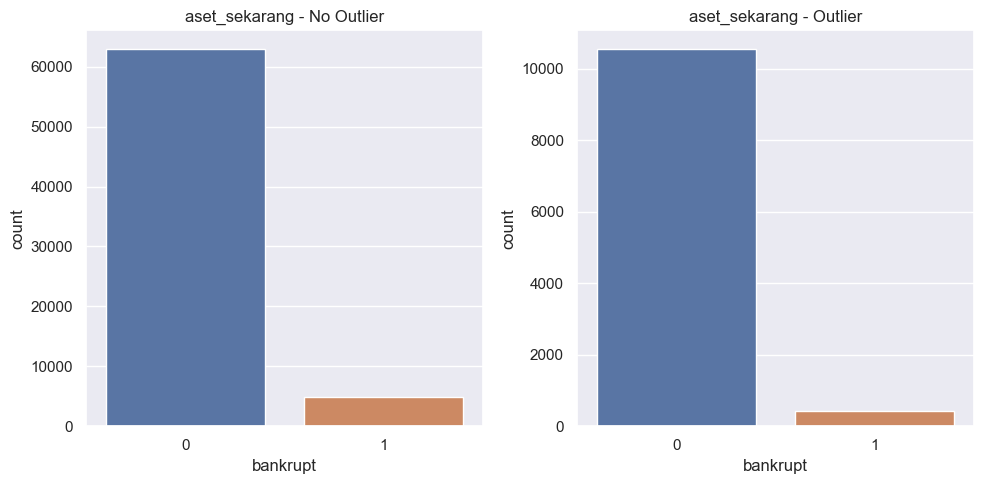

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

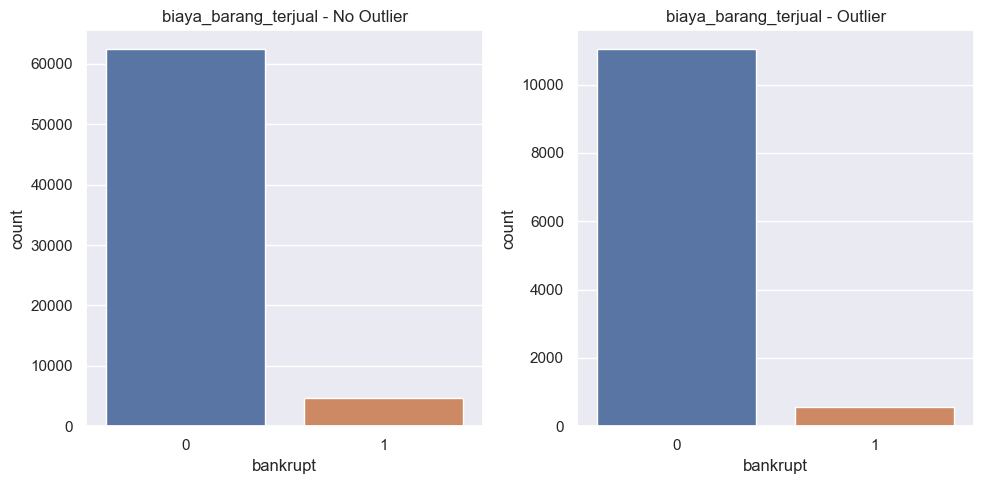

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

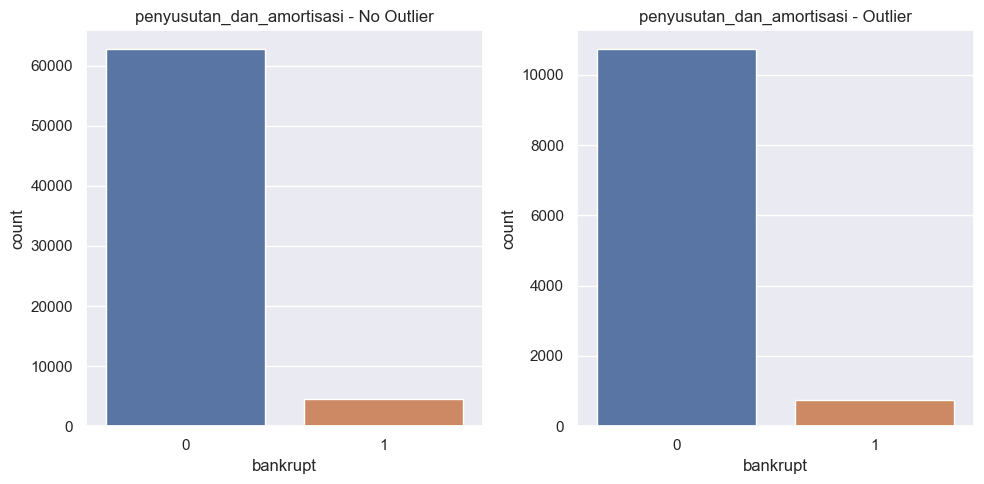

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

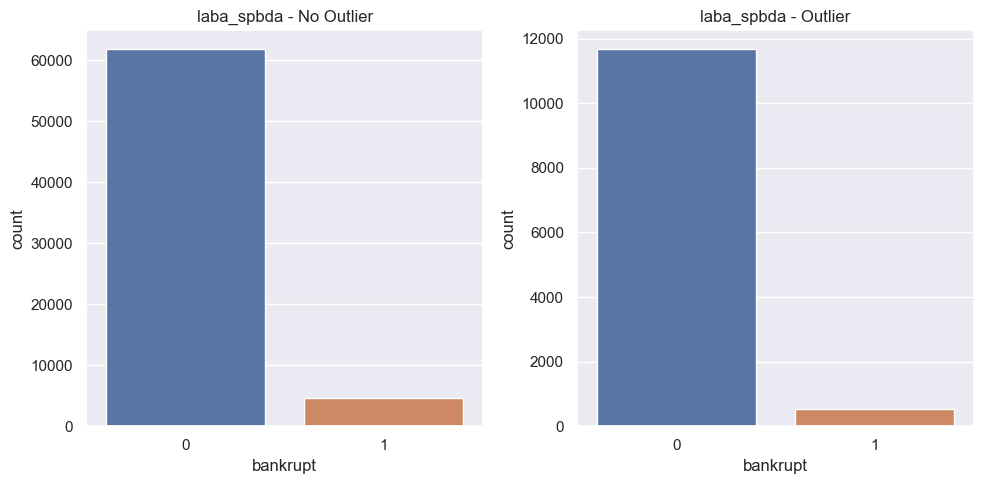

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

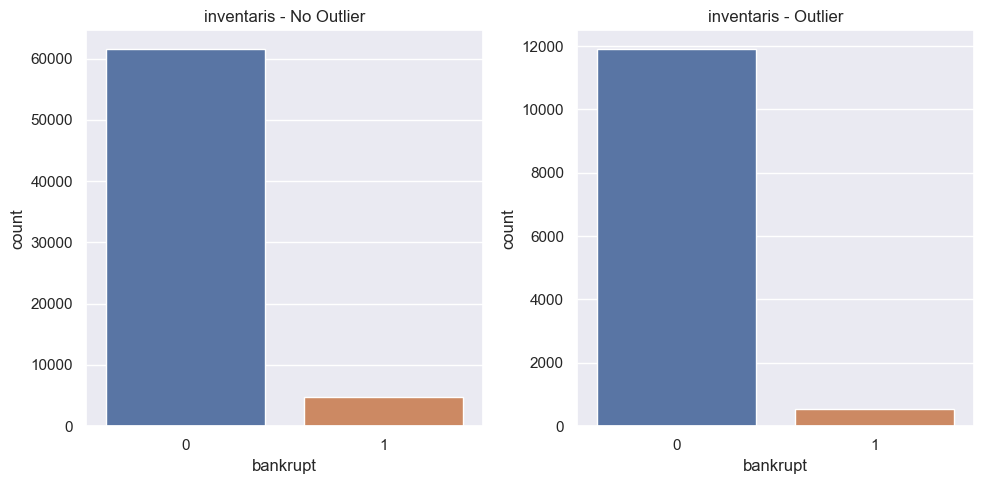

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

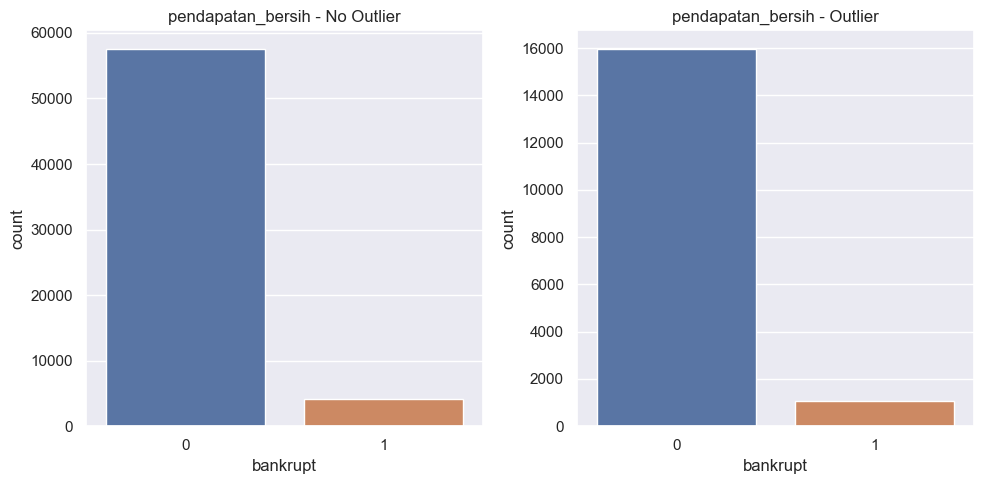

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

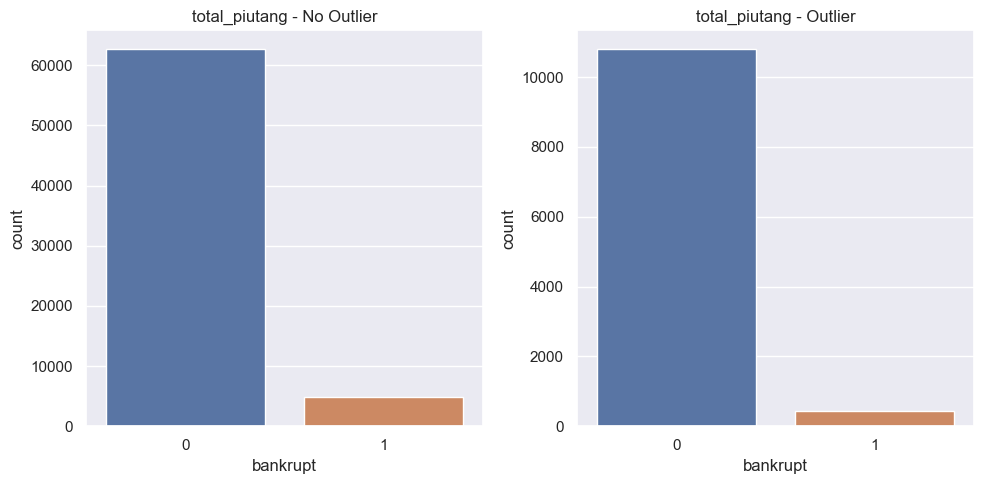

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

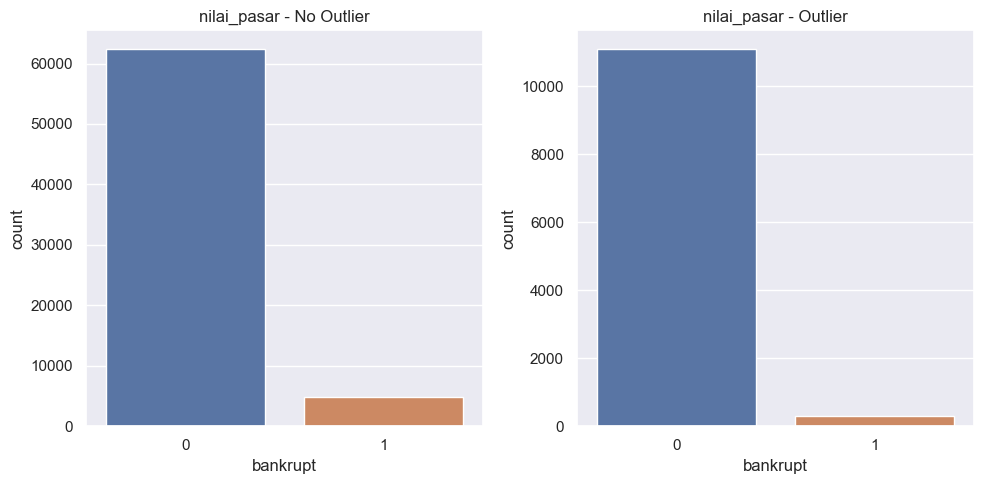

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

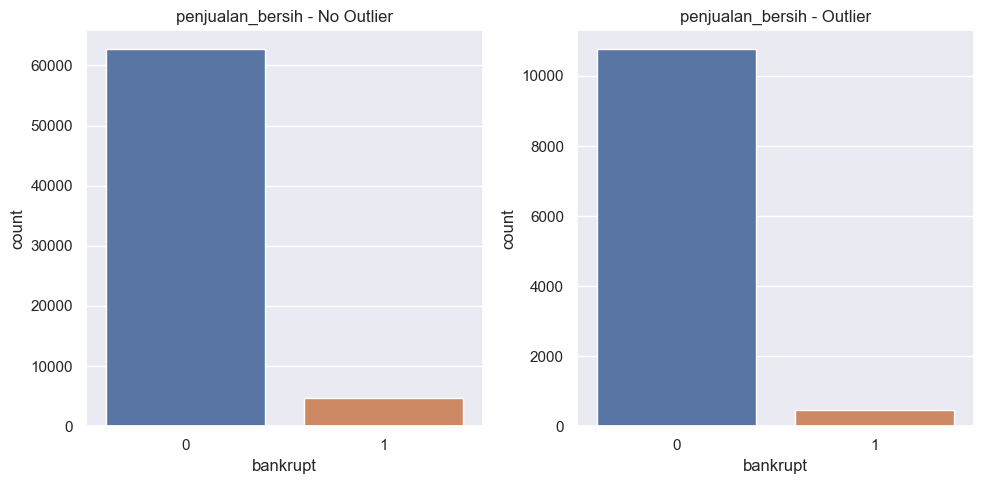

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

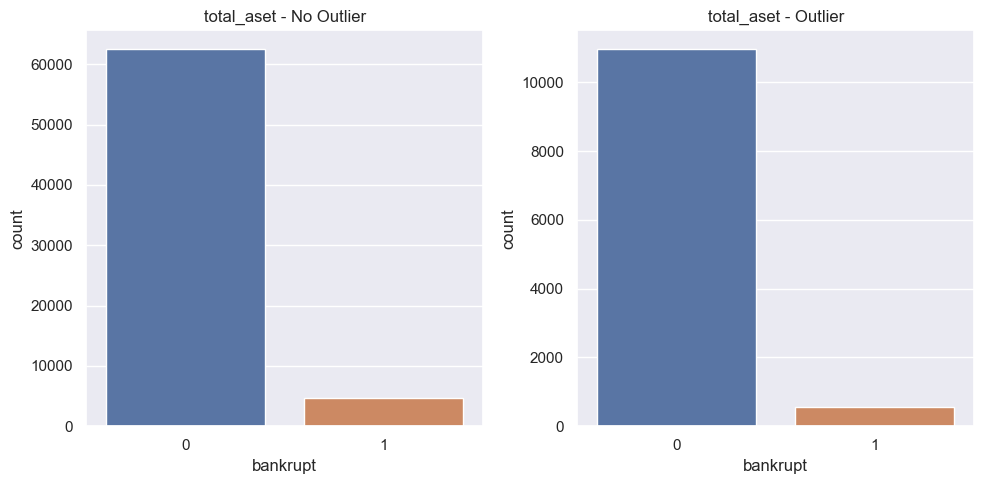

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

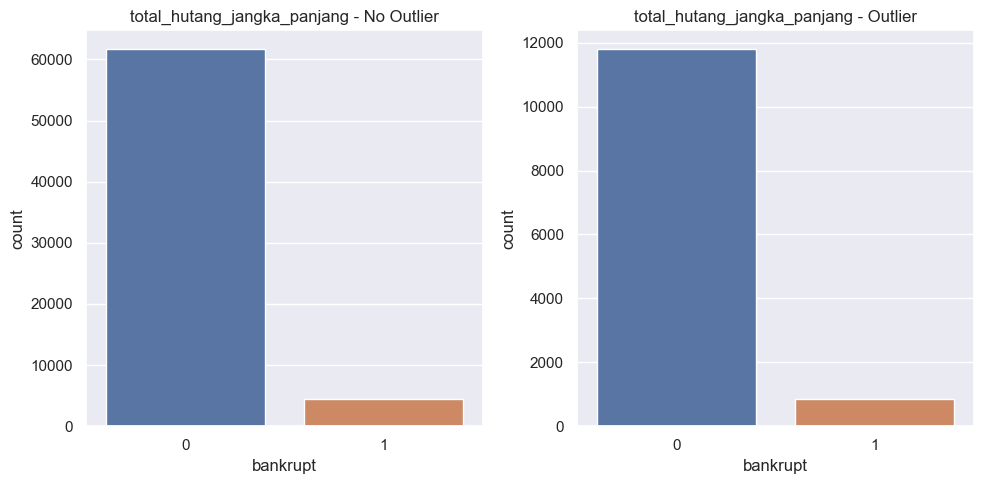

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

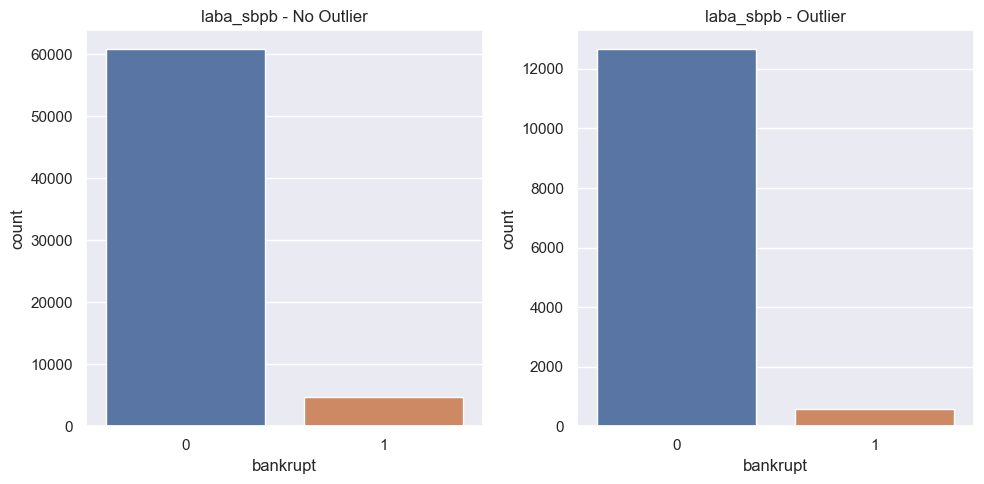

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

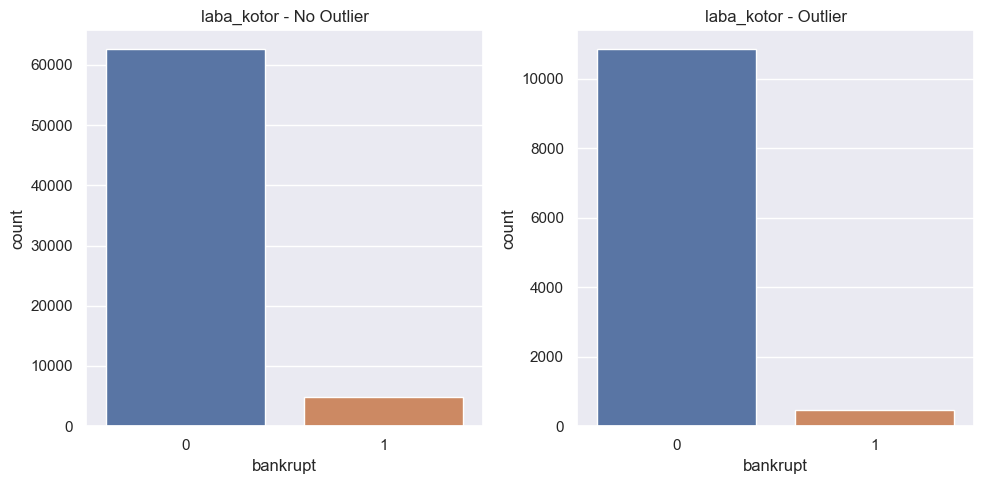

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

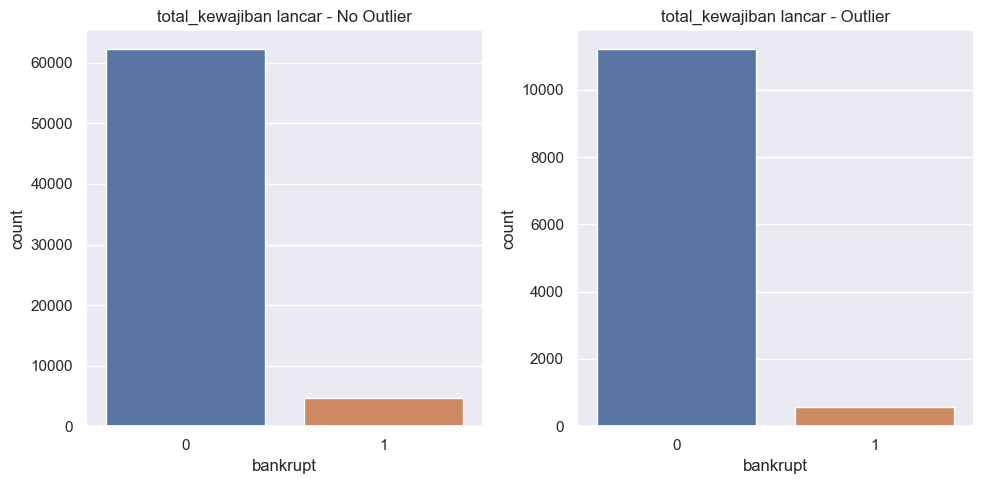

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

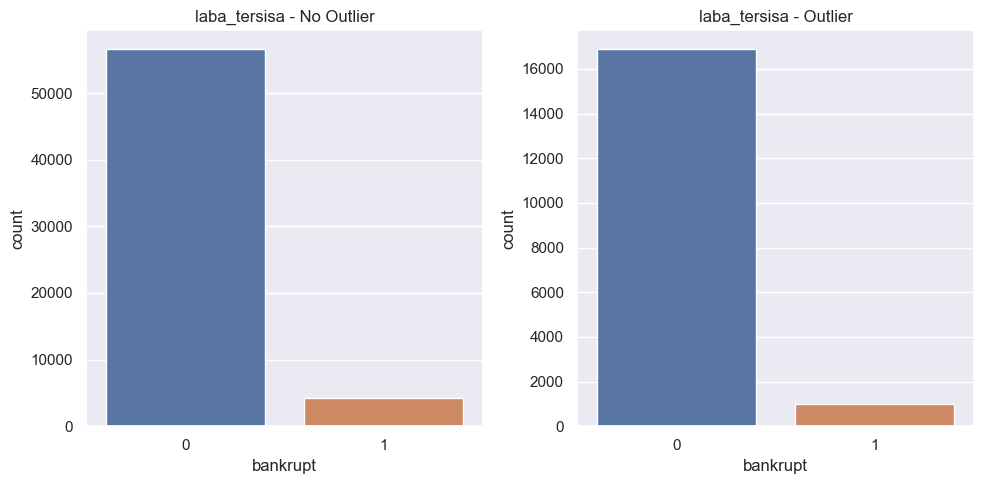

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

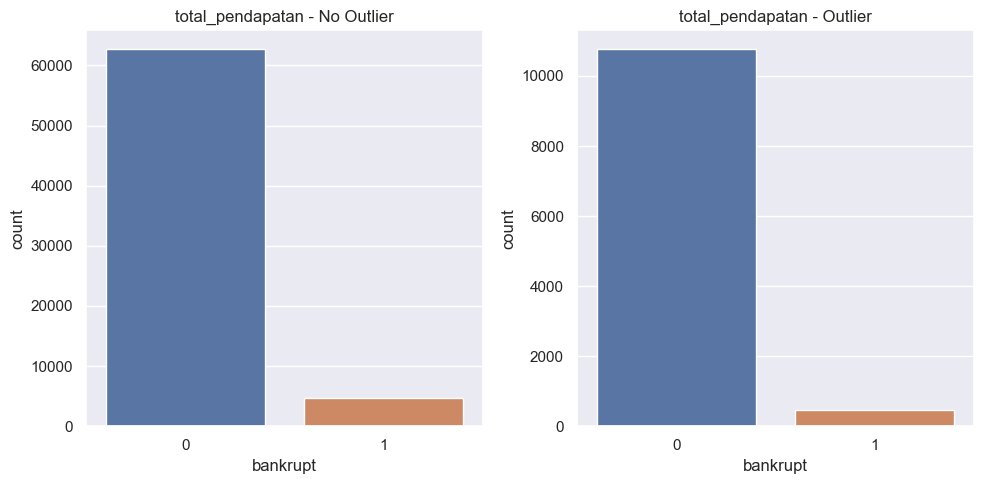

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

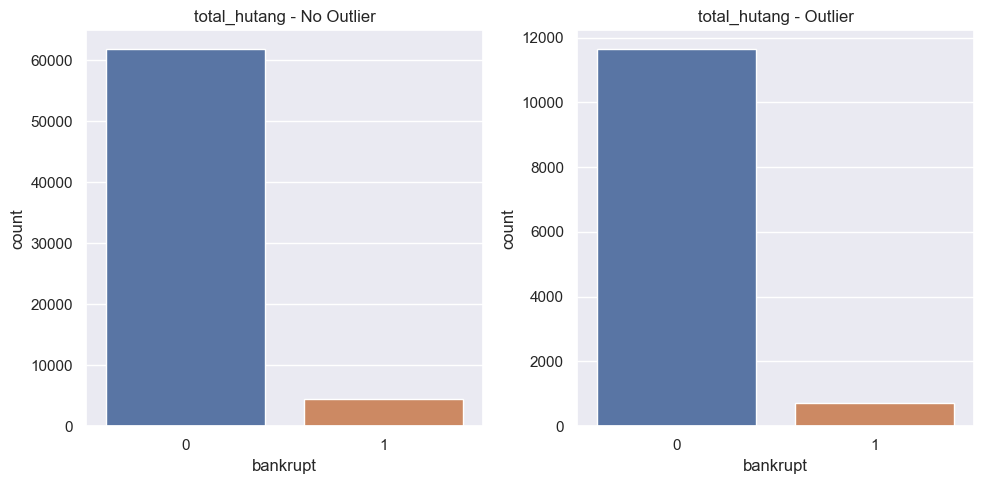

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

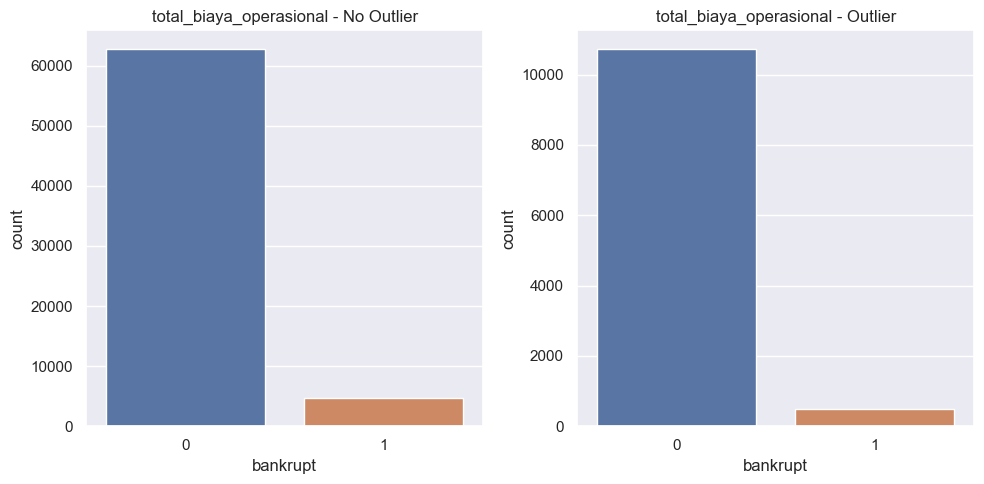

In [19]:
# menandai apakah data adalah outlier atau tidak
for col in outlier_col:
    
    q1                       = df2[col].quantile(0.25)
    q3                       = df2[col].quantile(0.75)
    iqr                      = q3 - q1
    upper_bound              = q3 + 1.5 * iqr
    lower_bound              = q1 - 1.5 * iqr
    df2[f'{col}_is_outlier'] = ((df2[col] < lower_bound) | (df2[col] > upper_bound)).astype(int)


# viz
for col in outlier_col:
    
    # Menghitung jumlah data dengan variabel target 'bankrupt' untuk setiap kelas di dalam dan di luar outlier
    data_outlier             = df2[df2[f'{col}_is_outlier'] == 1].groupby('bankrupt').size().reset_index(name='count')
    data_no_outlier          = df2[df2[f'{col}_is_outlier'] == 0].groupby('bankrupt').size().reset_index(name='count')

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.barplot(data=data_no_outlier,
                x='bankrupt',
                y='count')
    
    plt.title(f'{col} - No Outlier')

    plt.subplot(1, 2, 2)
    sns.barplot(data=data_outlier, x='bankrupt', y='count')
    plt.title(f'{col} - Outlier')

    plt.tight_layout()
    plt.show()


Outlier tidak akan dihapus, karena takutnya nggak ada perusahaan yang bangkrut (bankrupt = 1) yang tersisa di database. Hal ini dikarenakan data perusahaan yang bangkrut menjadi sangat sedikit. Jadi lebih baik untuk tidak menghapus outlier **data sangat berharga**.

Selain itu, ada kemungkinan juga data dari perusahaan yang tidak bangkrut itu rata-rata nilai dari beberapa variabel itu memang lebih tinggi dibandingkan dengan rata-rata nilai dari perusahaan yang bangkrut.

Sehingga data yang imbalance tersebut nantinya perlu kita seimbangkan, salah satunya dengan menggunakan **SMOTE**

In [20]:
df3 = df.copy()
df3 = df3.drop(columns=['nama_perusahaan'], axis=1)

In [21]:
def cari_outlier(col):
    condong = df3.skew()

    # handling 1
    if (condong >= -0.5).all() and (condong <= 0.5).all():
        upper = df3[col].mean() + 3 * df3[col].std()
        lower = df3[col].mean() - 3 * df3[col].std()
    
    else:
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1

        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
    
    tidak_outlier = df3[(df3[col]>=lower) & (df3[col]<=upper)]
    outliers = df3[(df3[col]>upper) | (df3[col]<lower)]
    
    return upper, lower, tidak_outlier, outliers

In [22]:
num = df3
n=len(num.columns)

for i in range(n):
    col = num.columns[i]
    up, low, tidak_out, out = cari_outlier(col)
    print(f'Kolom: {col}')
    print('Jumlah outlier: ', len(out))
    print('-'*40)

Kolom: bankrupt
Jumlah outlier:  5220
----------------------------------------
Kolom: year
Jumlah outlier:  0
----------------------------------------
Kolom: aset_sekarang
Jumlah outlier:  10975
----------------------------------------
Kolom: biaya_barang_terjual
Jumlah outlier:  11594
----------------------------------------
Kolom: penyusutan_dan_amortisasi
Jumlah outlier:  11475
----------------------------------------
Kolom: laba_spbda
Jumlah outlier:  12218
----------------------------------------
Kolom: inventaris
Jumlah outlier:  12435
----------------------------------------
Kolom: pendapatan_bersih
Jumlah outlier:  17004
----------------------------------------
Kolom: total_piutang
Jumlah outlier:  11237
----------------------------------------
Kolom: nilai_pasar
Jumlah outlier:  11409
----------------------------------------
Kolom: penjualan_bersih
Jumlah outlier:  11225
----------------------------------------
Kolom: total_aset
Jumlah outlier:  11521
-------------------------

### Analisis Univariate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

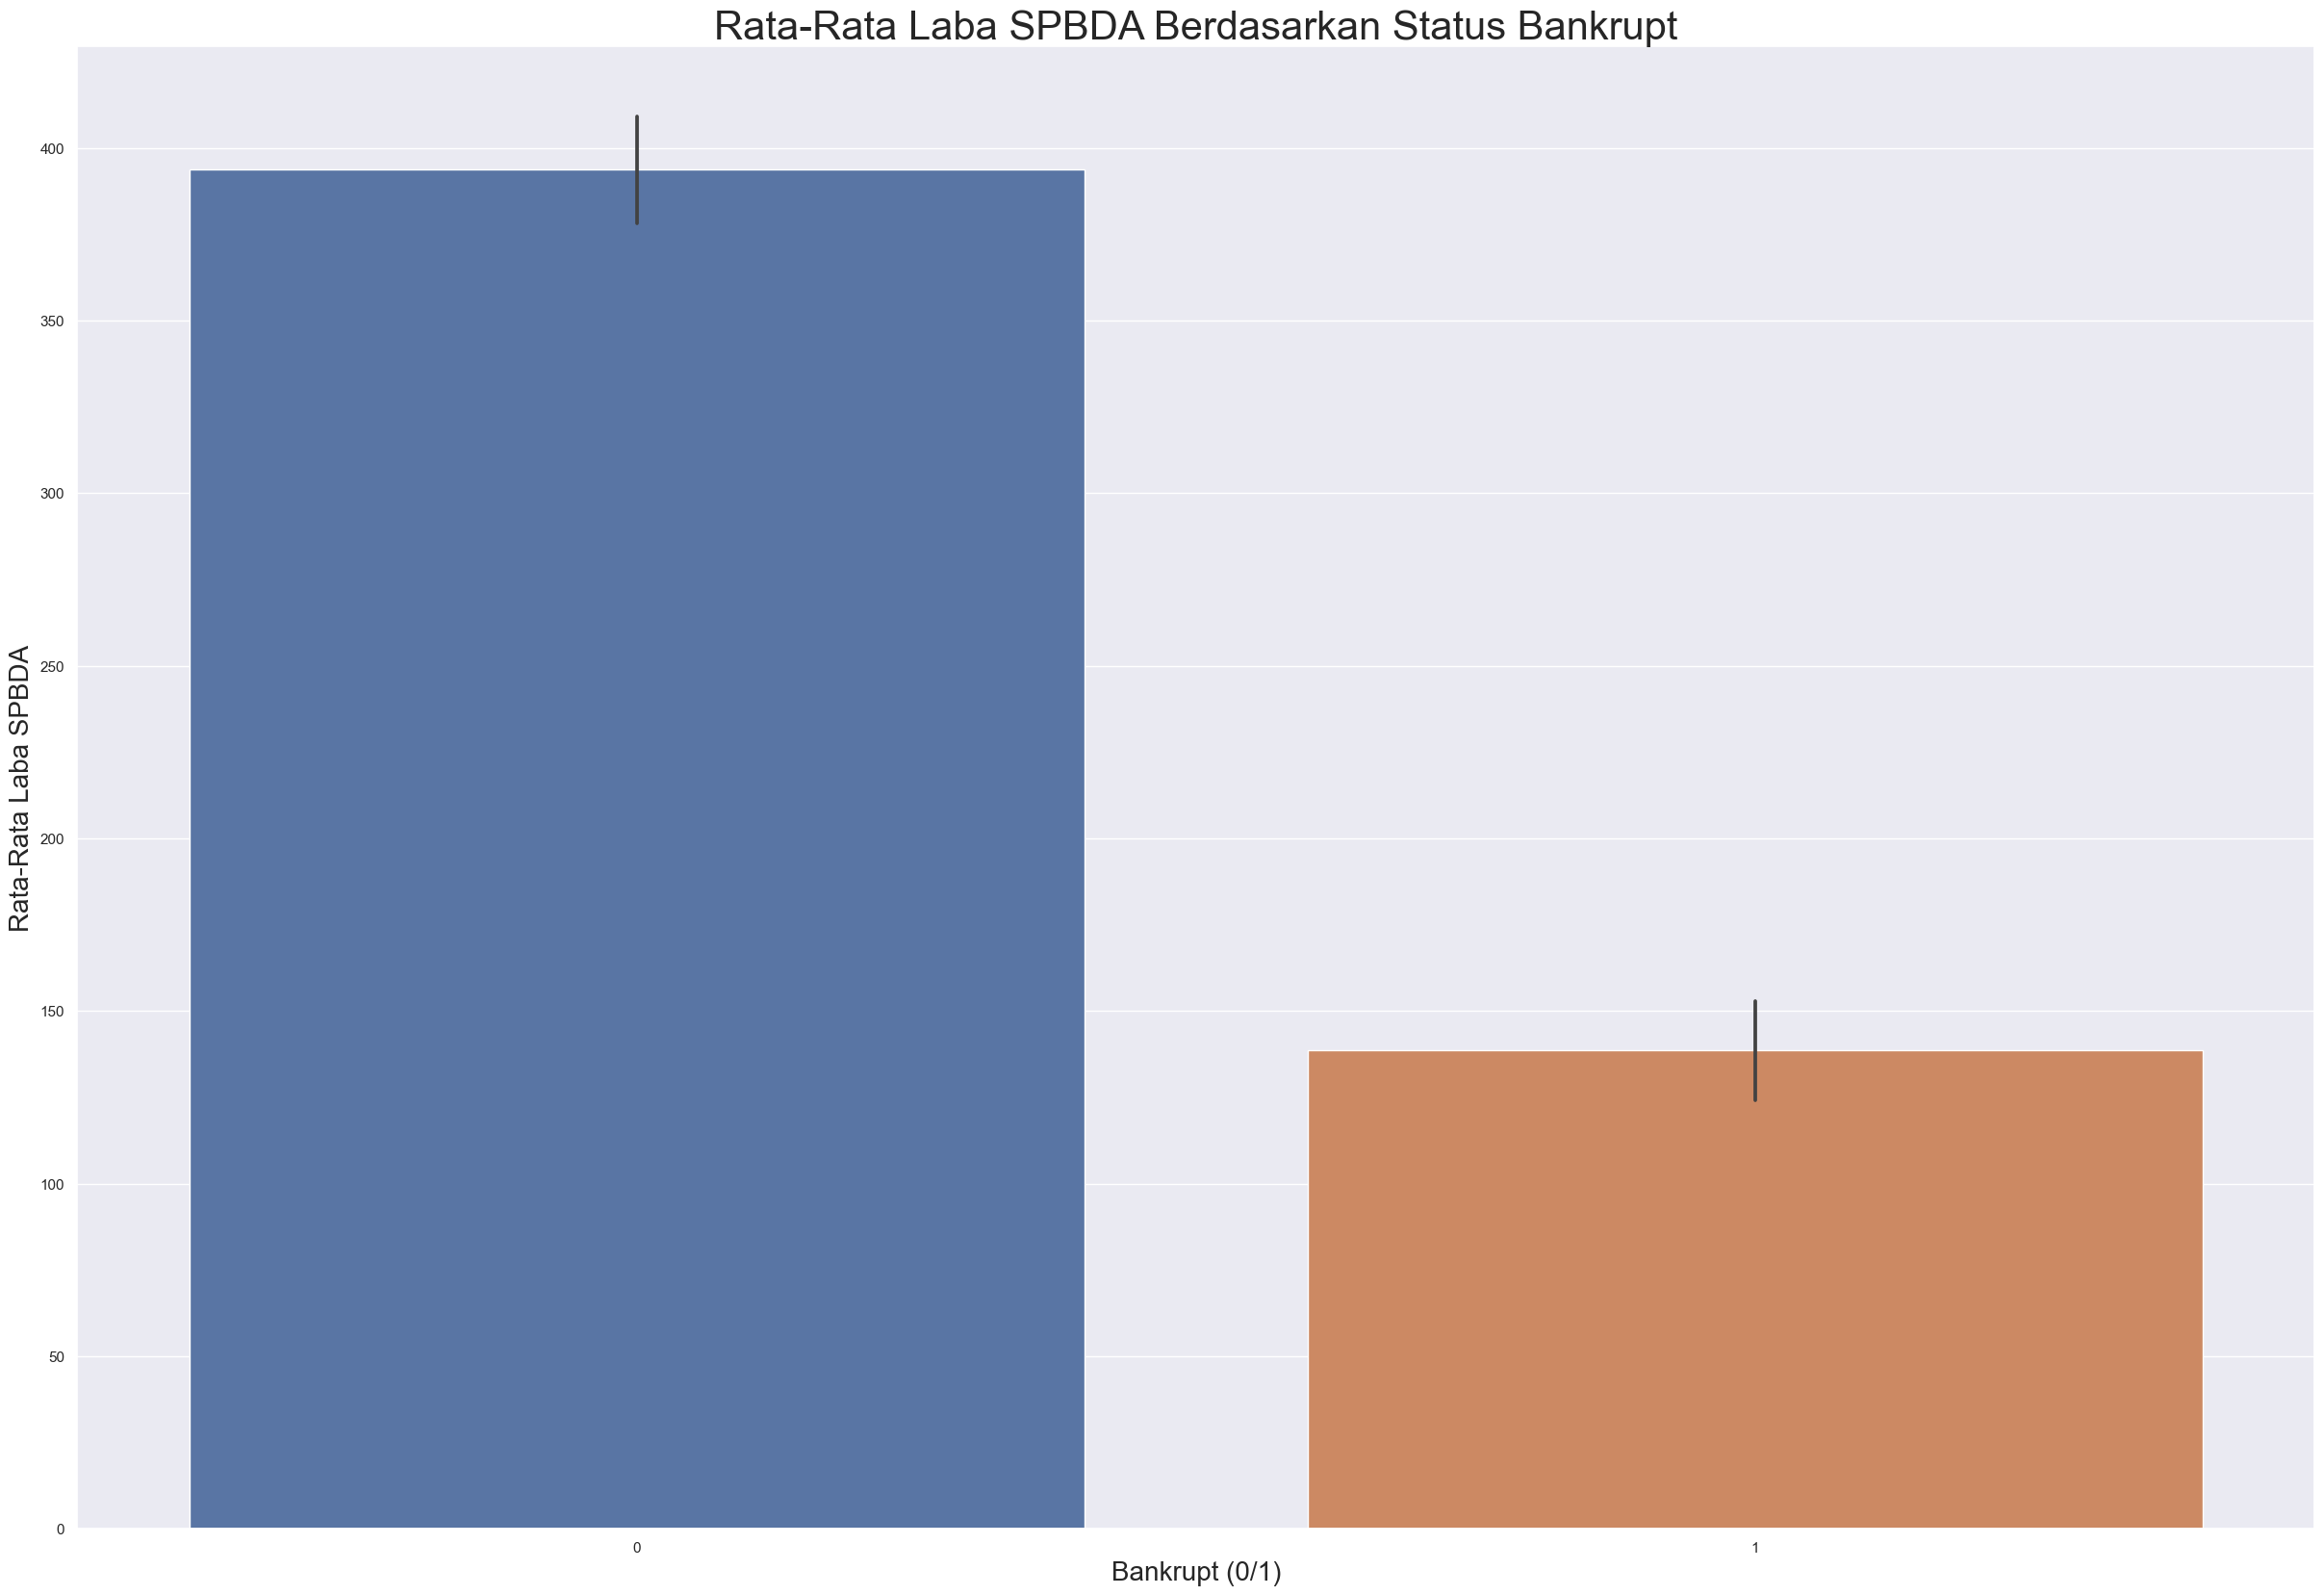

In [23]:
plt.figure(figsize=(30, 20))
sns.barplot(x='bankrupt', y='laba_spbda', data=df3)
plt.title("Rata-Rata Laba SPBDA Berdasarkan Status Bankrupt", fontsize=30)
plt.xlabel("Bankrupt (0/1)", fontsize=20)
plt.ylabel("Rata-Rata Laba SPBDA", fontsize=20)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

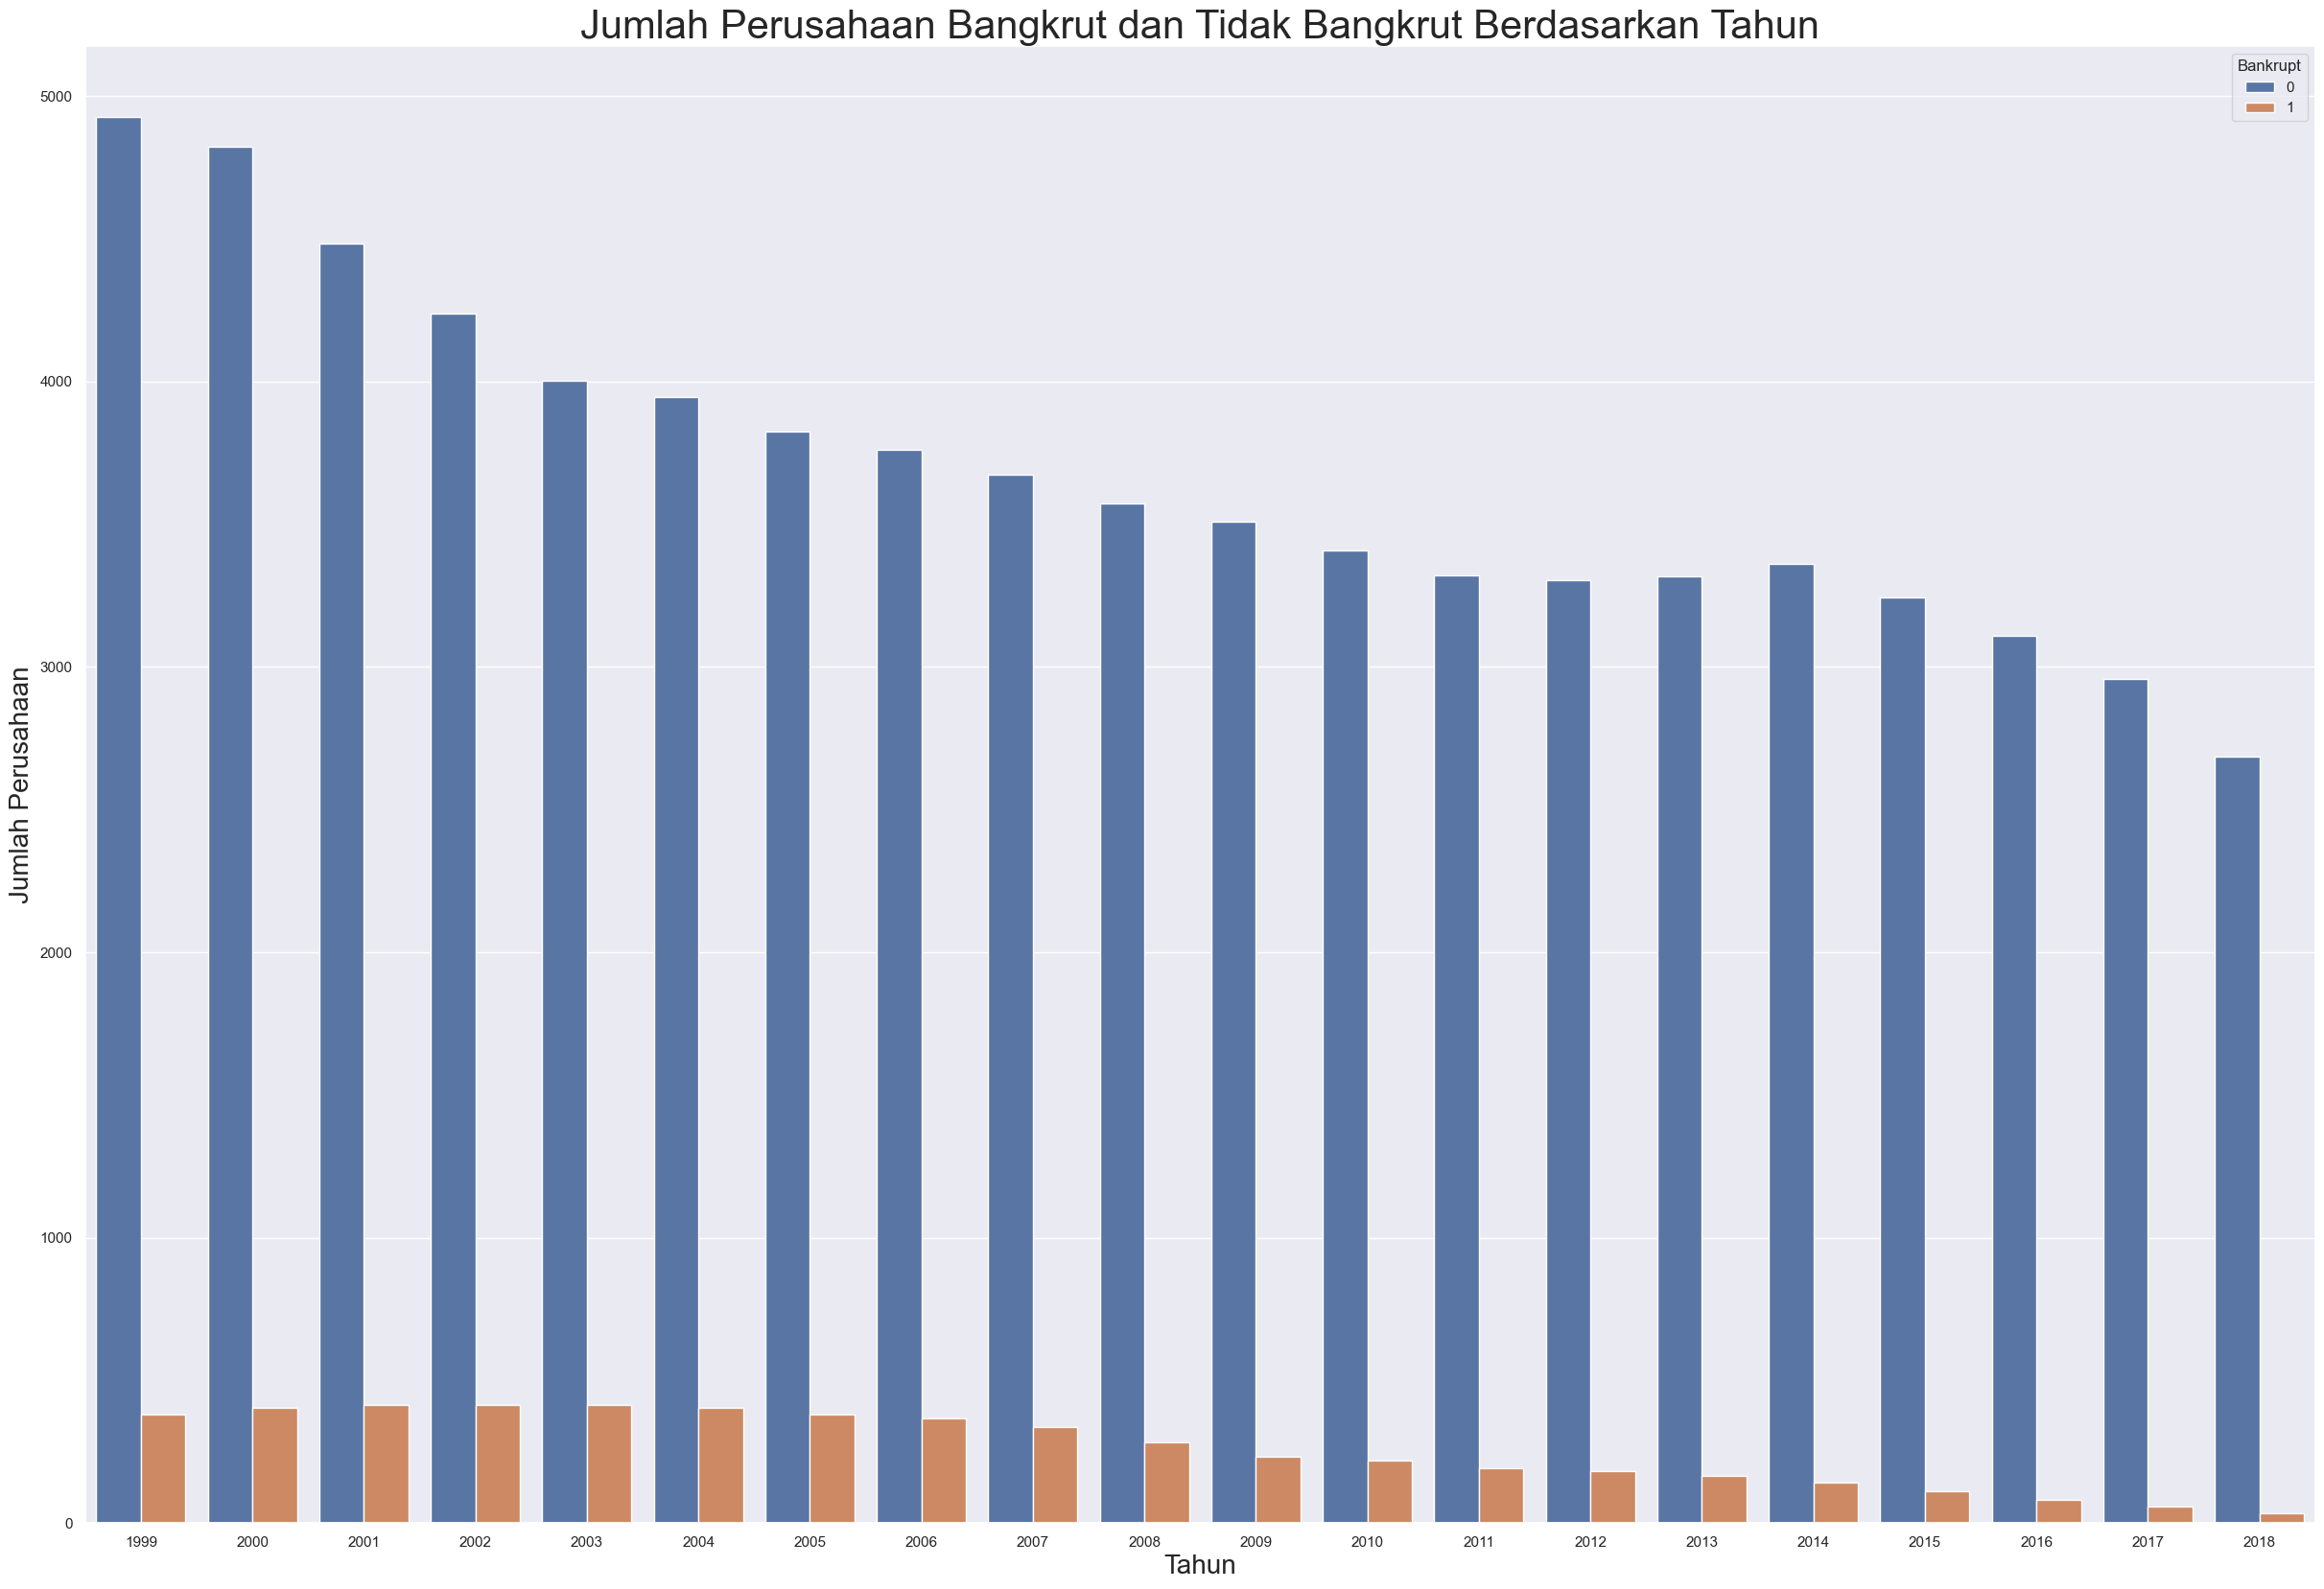

In [24]:
plt.figure(figsize=(30, 20))
sns.countplot(data=df3, x='year', hue='bankrupt')
plt.title('Jumlah Perusahaan Bangkrut dan Tidak Bangkrut Berdasarkan Tahun', fontsize=30)
plt.xlabel('Tahun', fontsize=20)
plt.ylabel('Jumlah Perusahaan', fontsize=20)
plt.legend(title='Bankrupt', loc='upper right')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

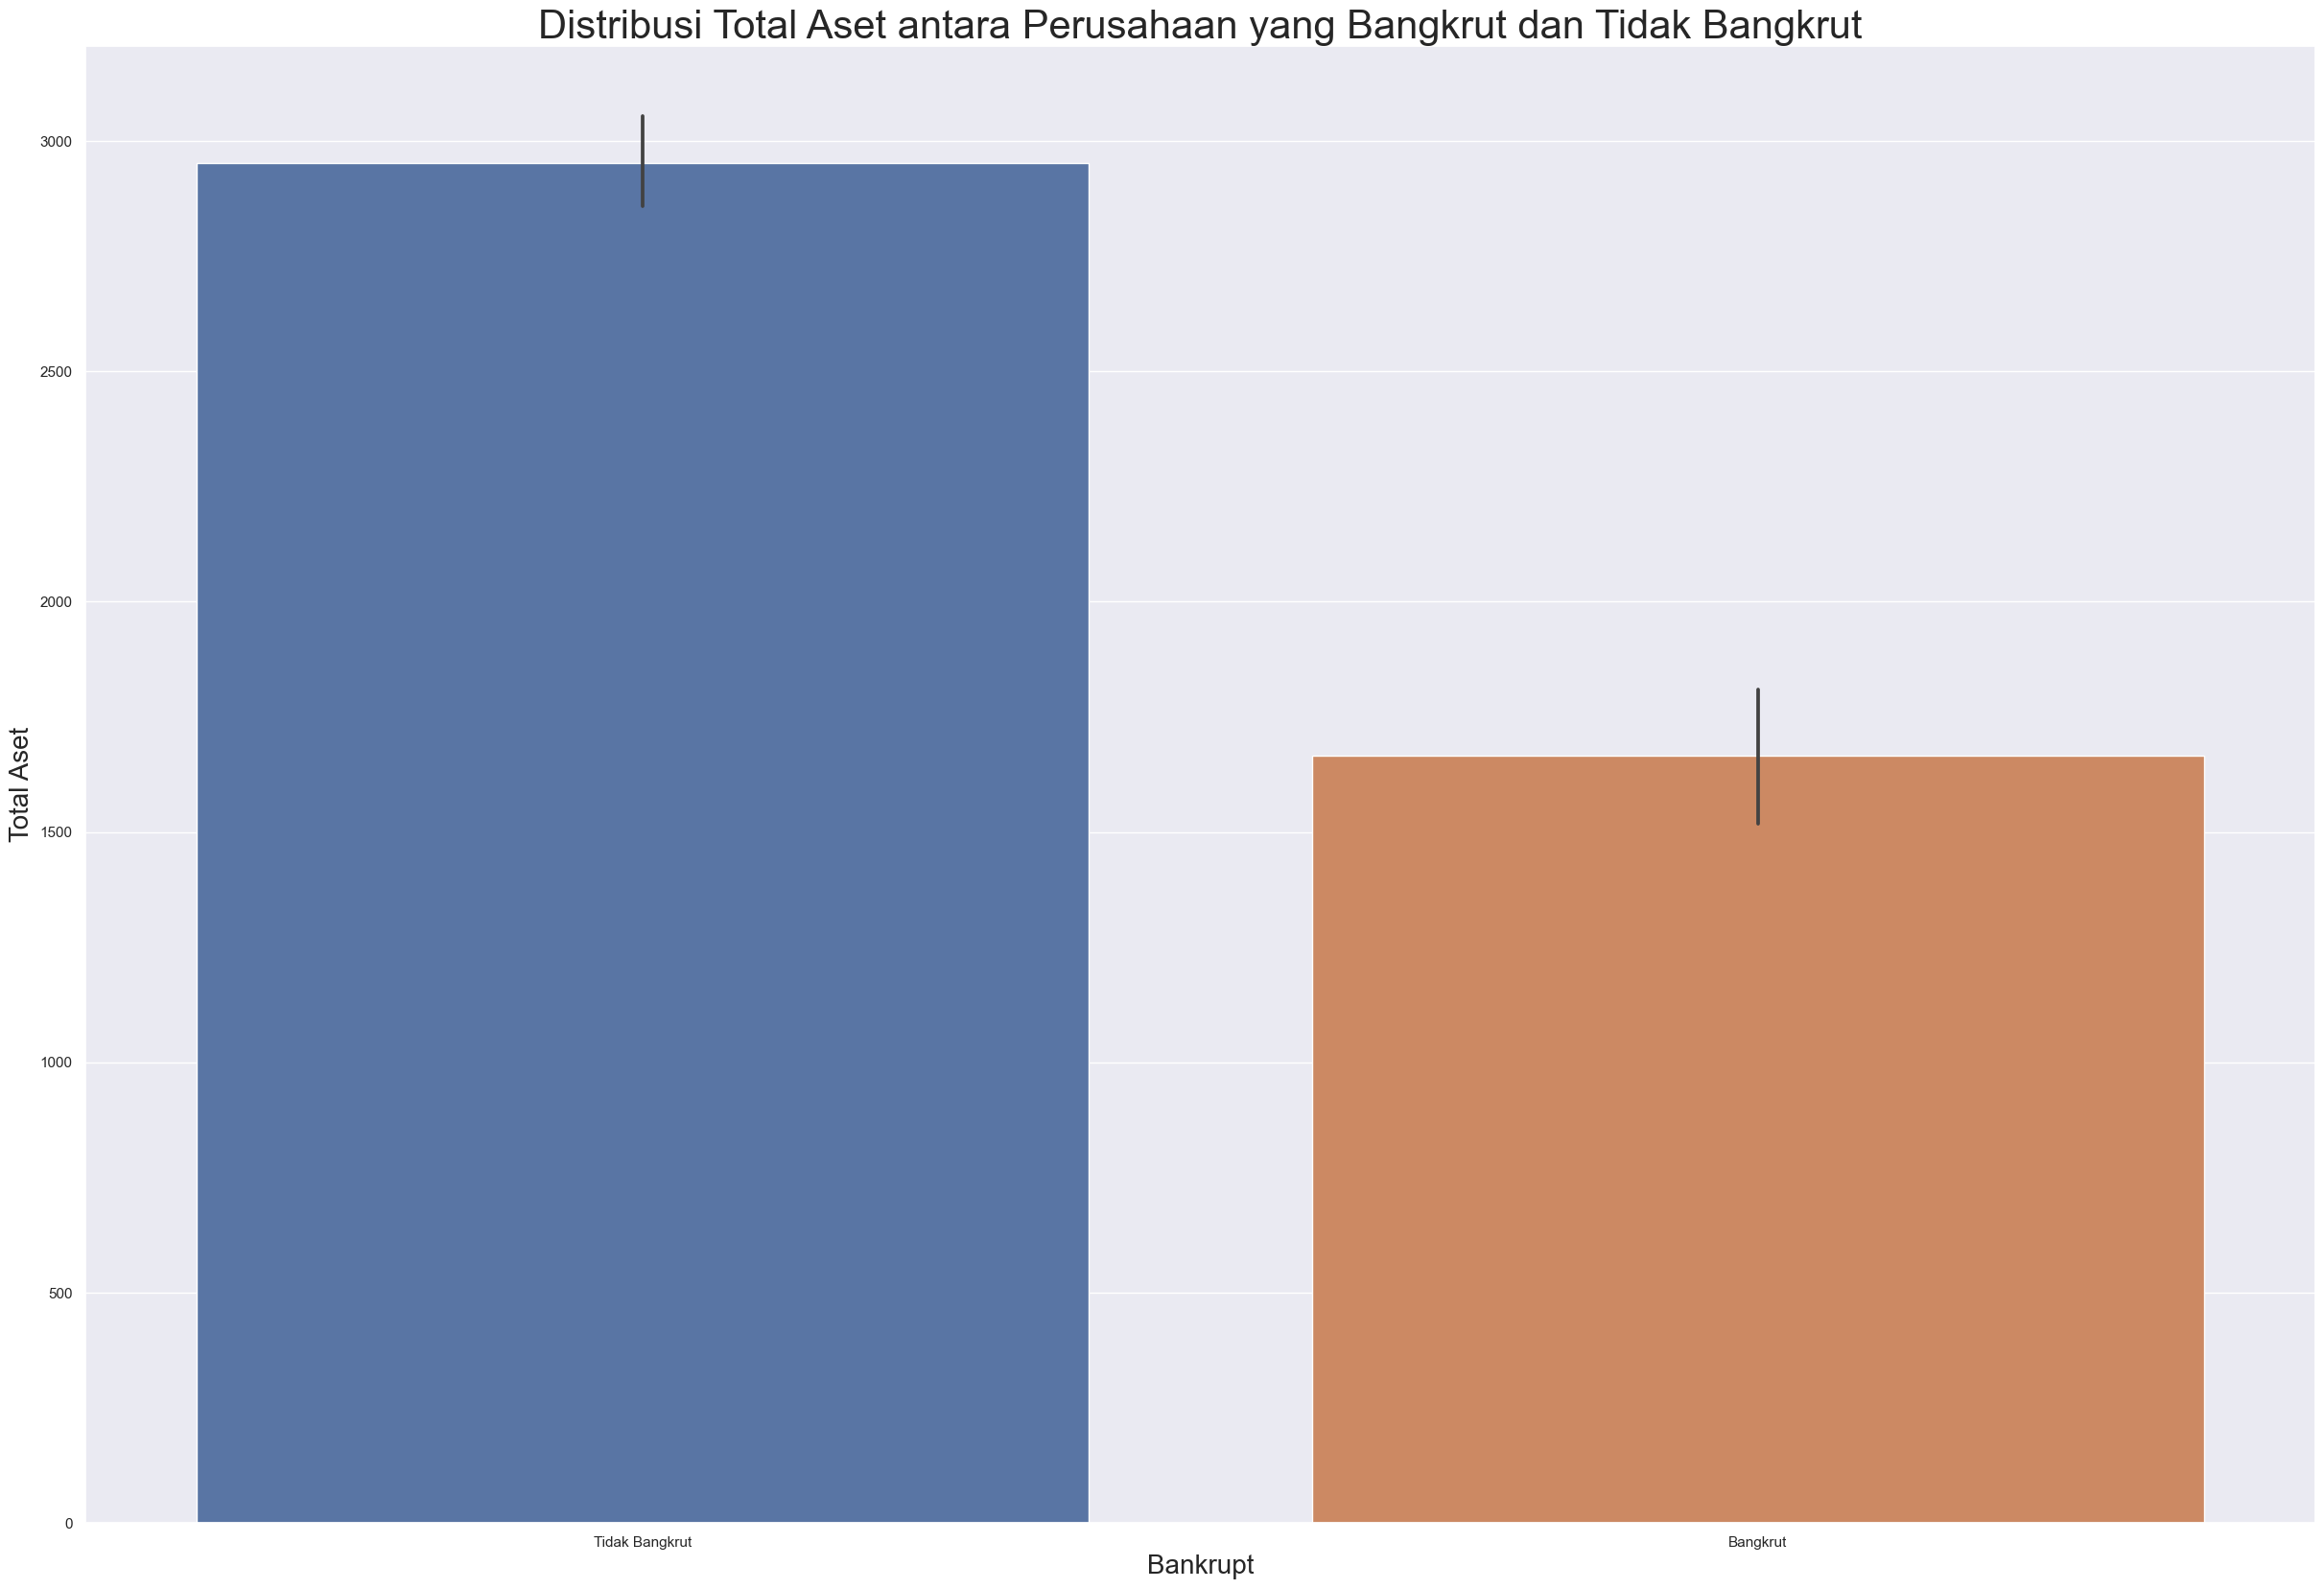

In [25]:
plt.figure(figsize=(30, 20))
sns.barplot(data=df3, x='bankrupt', y='total_aset')
plt.title('Distribusi Total Aset antara Perusahaan yang Bangkrut dan Tidak Bangkrut', fontsize=30)
plt.xlabel('Bankrupt', fontsize=20)
plt.ylabel('Total Aset', fontsize=20)
plt.xticks([0, 1], ['Tidak Bangkrut', 'Bangkrut'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

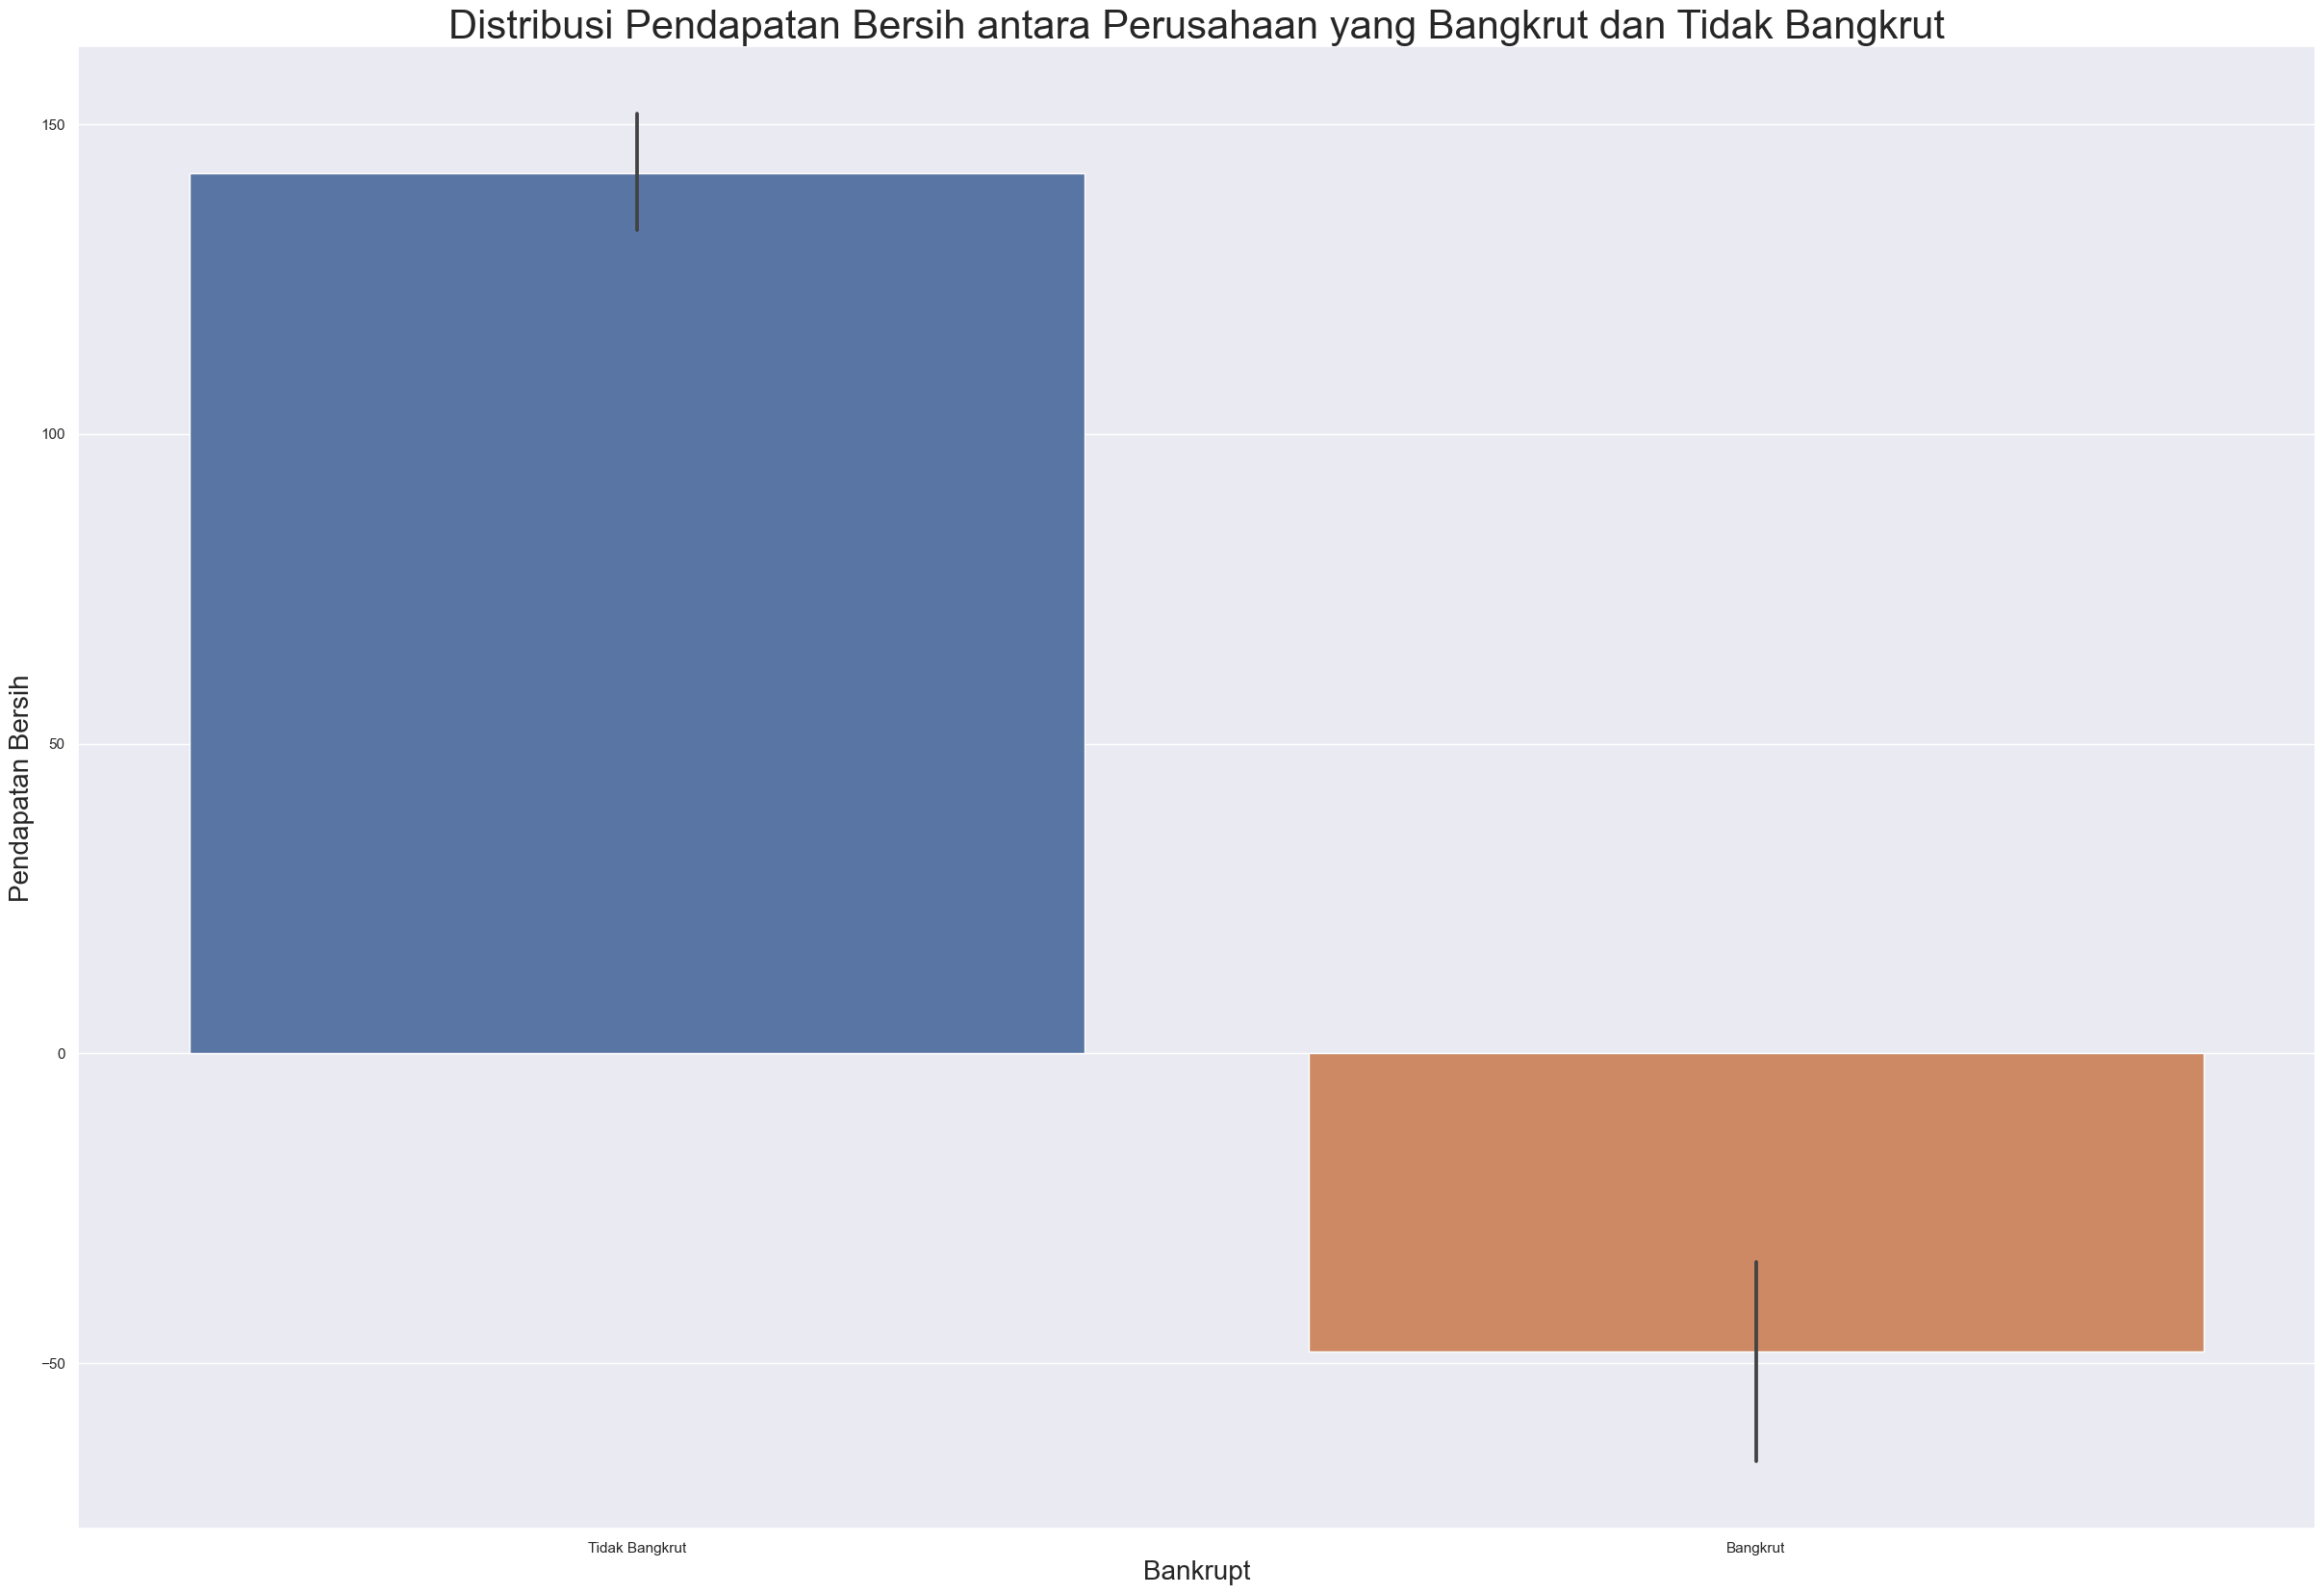

In [26]:
plt.figure(figsize=(30, 20))
sns.barplot(data=df3, x='bankrupt', y='pendapatan_bersih')
plt.title('Distribusi Pendapatan Bersih antara Perusahaan yang Bangkrut dan Tidak Bangkrut', fontsize=30)
plt.xlabel('Bankrupt', fontsize=20)
plt.ylabel('Pendapatan Bersih', fontsize=20)
plt.xticks([0, 1], ['Tidak Bangkrut', 'Bangkrut'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

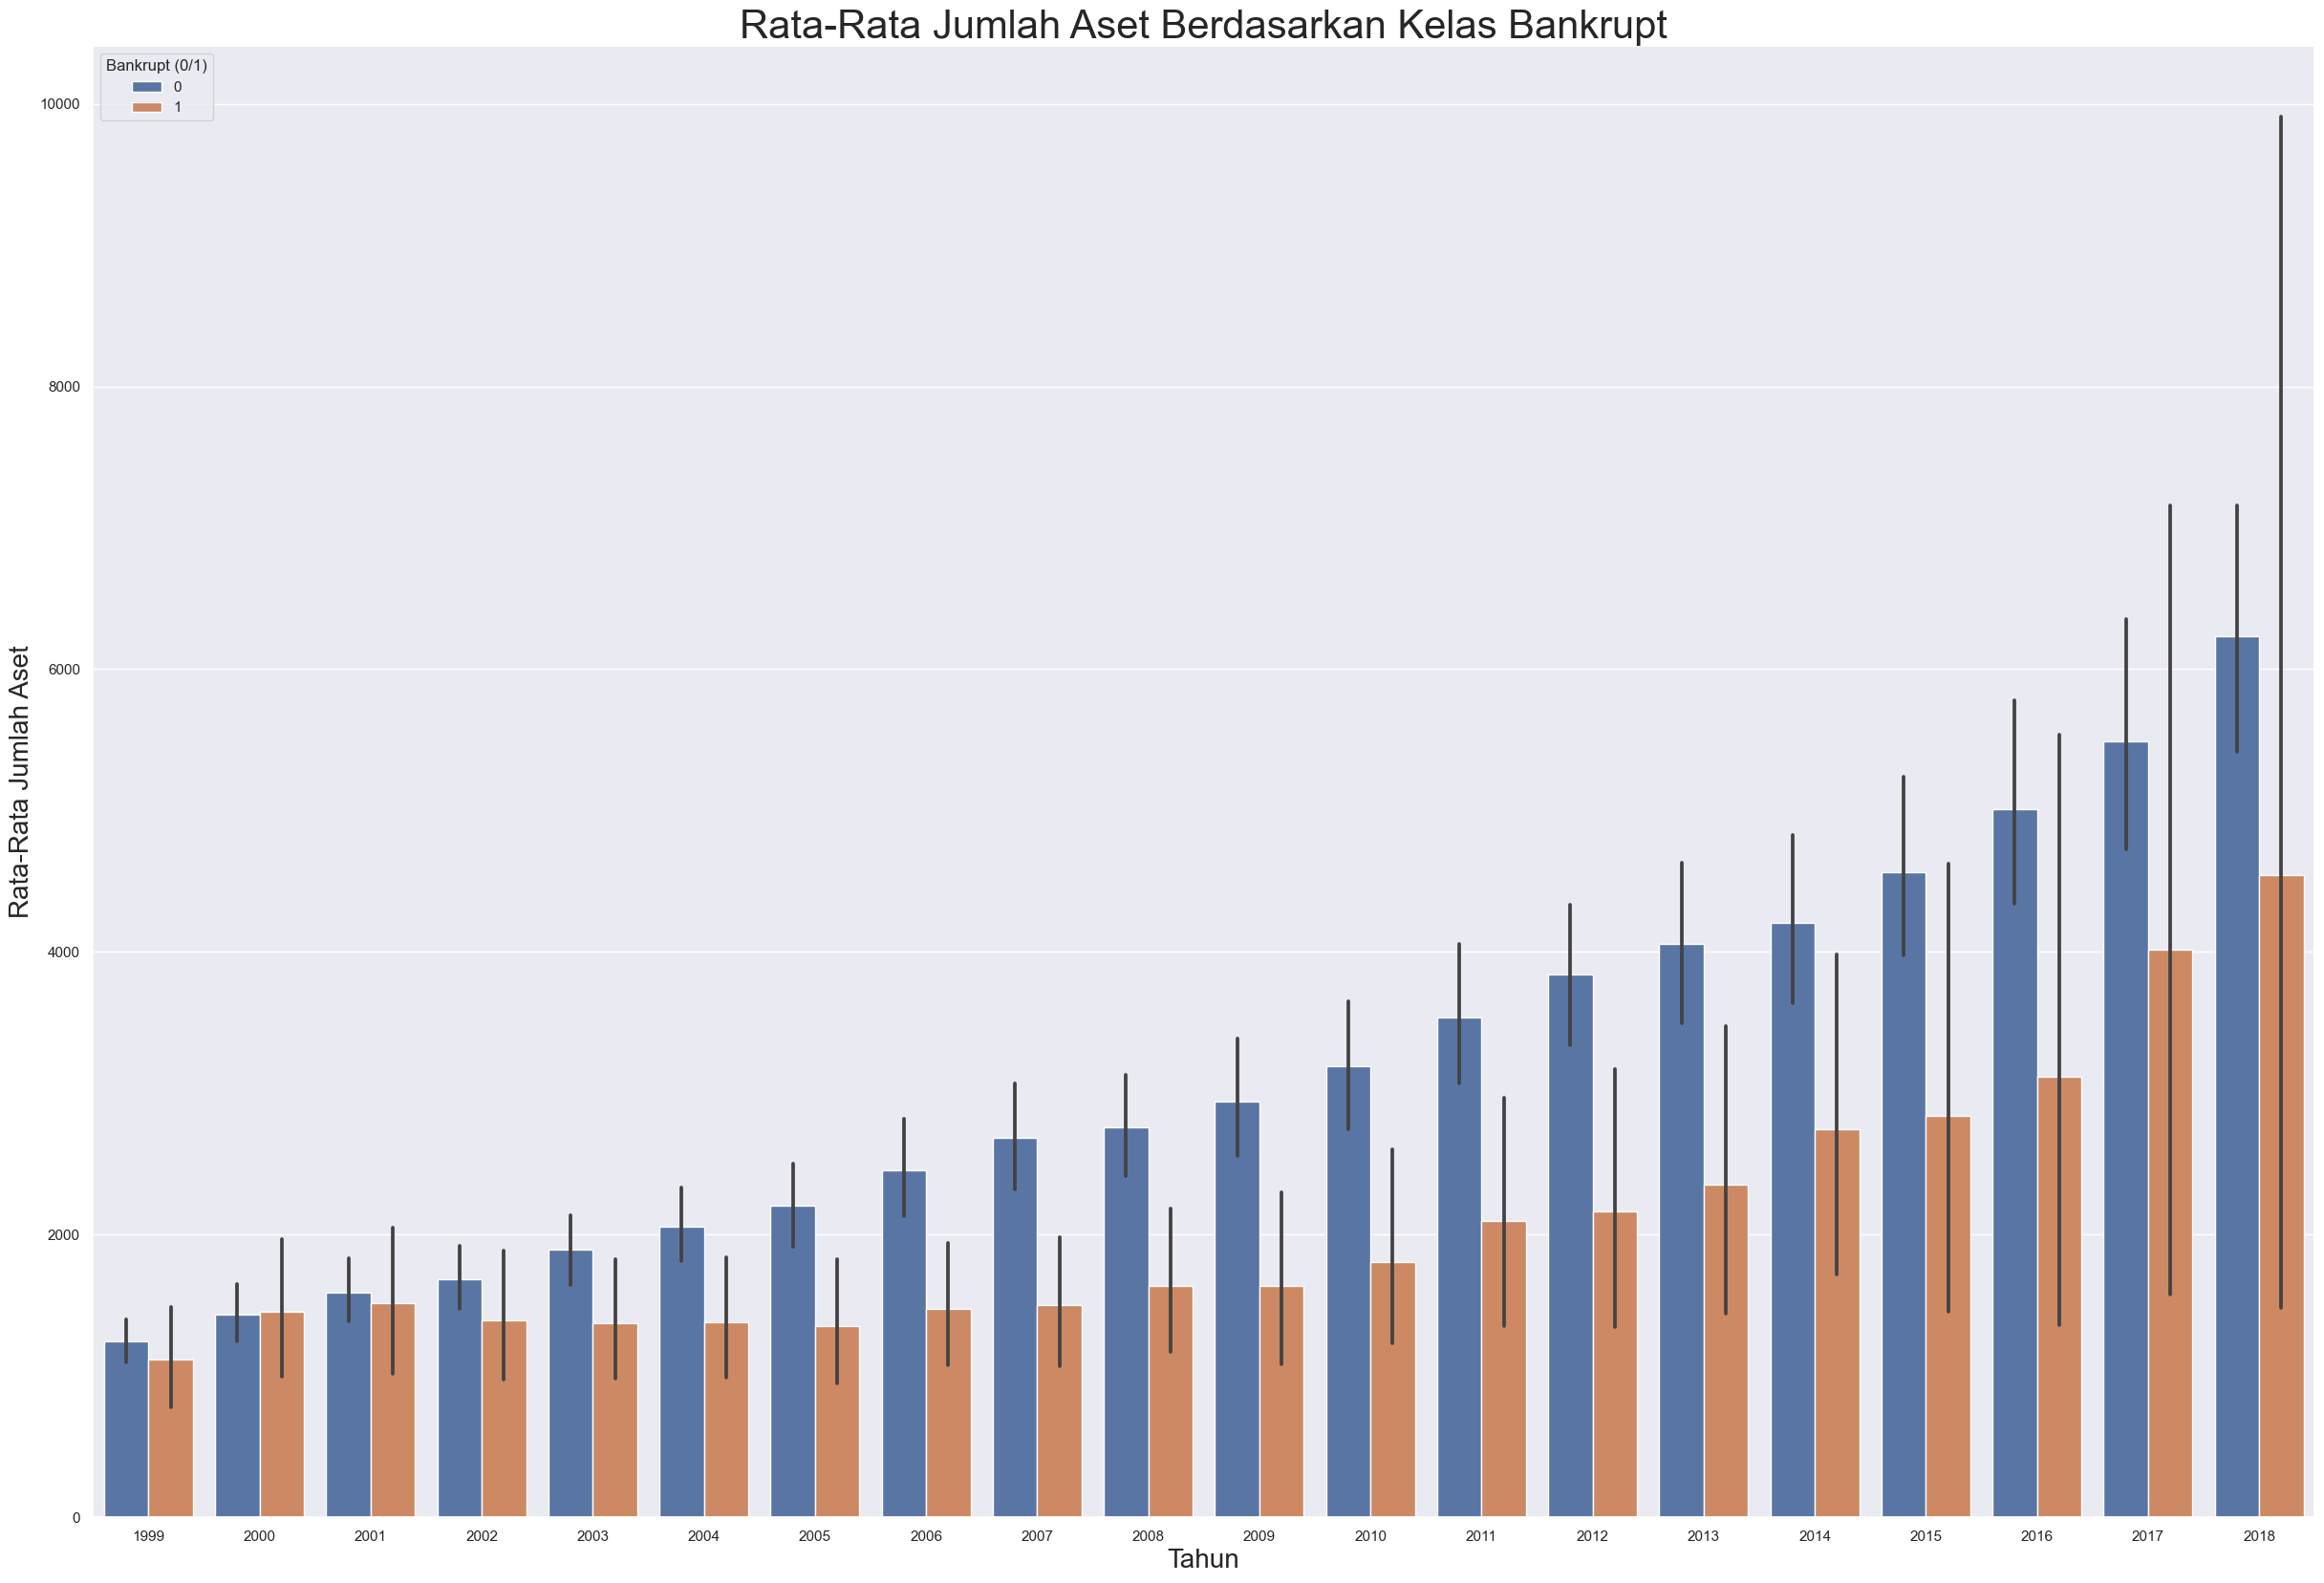

In [27]:
plt.figure(figsize=(30, 20))
sns.barplot(x='year', y='total_aset', hue='bankrupt', data=df3)
plt.title("Rata-Rata Jumlah Aset Berdasarkan Kelas Bankrupt", fontsize=30)
plt.xlabel("Tahun", fontsize=20)
plt.ylabel("Rata-Rata Jumlah Aset", fontsize=20)
plt.legend(title="Bankrupt (0/1)")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

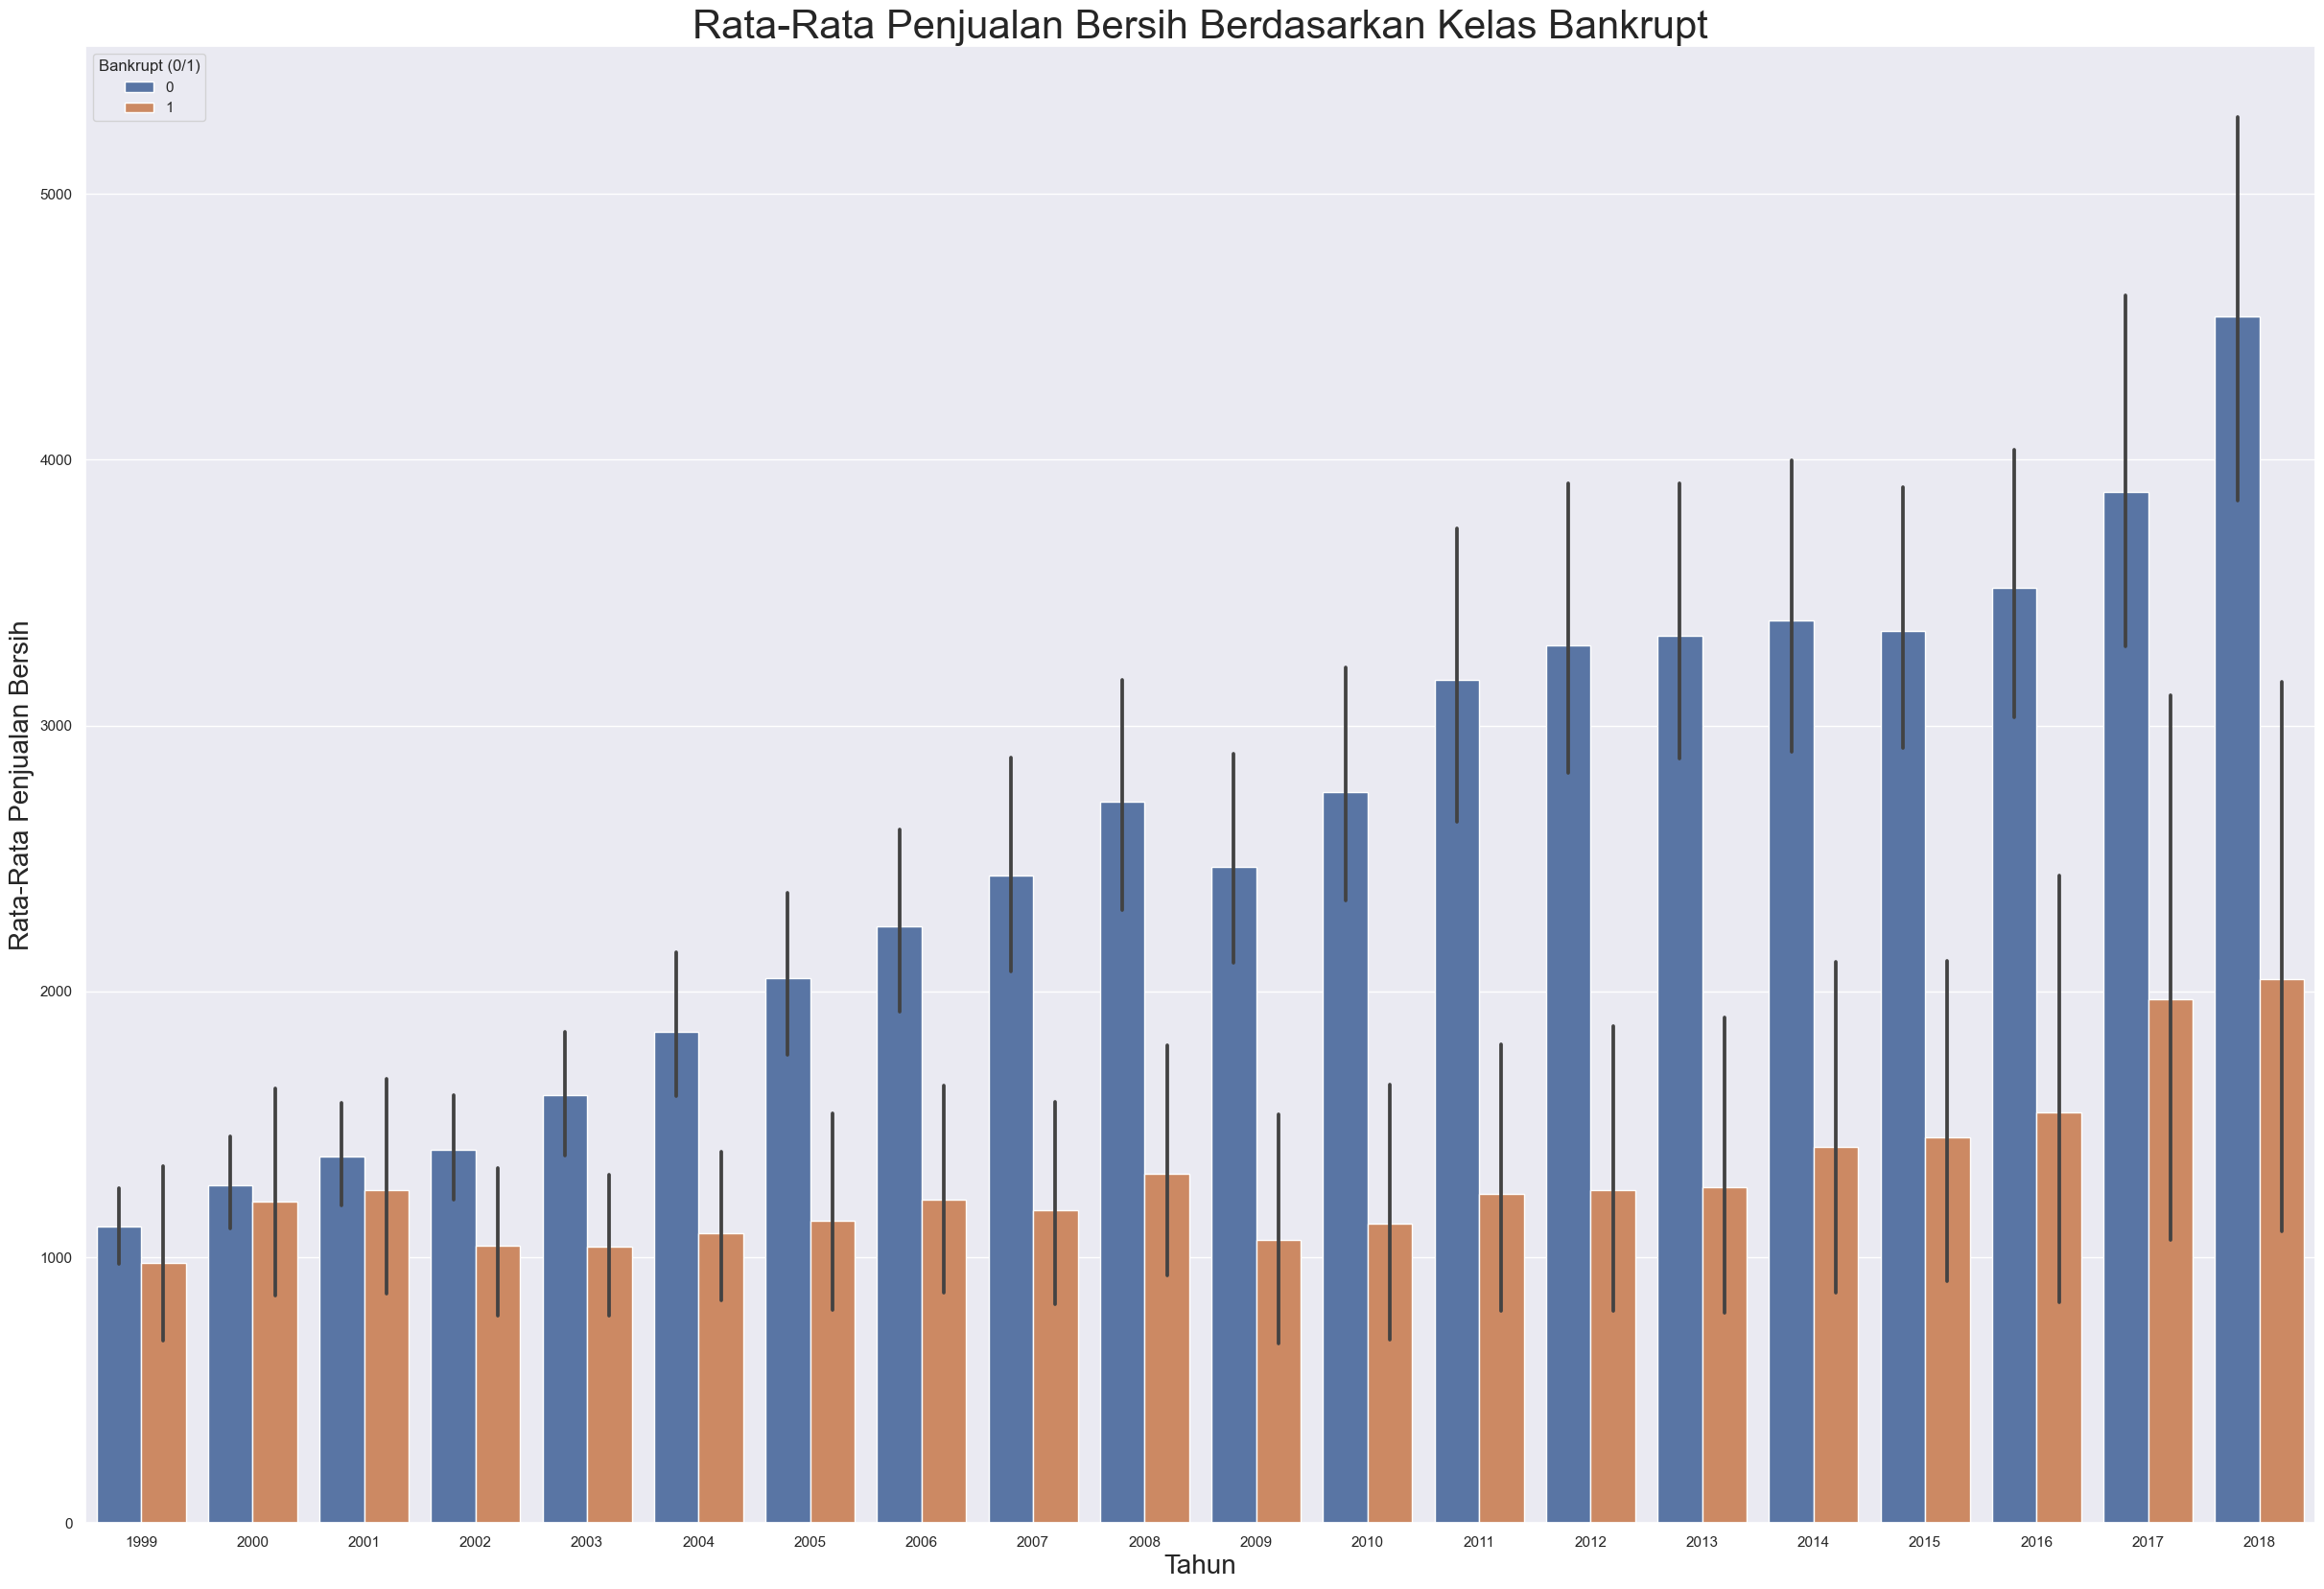

In [28]:
plt.figure(figsize=(30, 20))
sns.barplot(x='year', y='penjualan_bersih', hue='bankrupt', data=df3)
plt.title("Rata-Rata Penjualan Bersih Berdasarkan Kelas Bankrupt", fontsize=30)
plt.xlabel("Tahun", fontsize=20)
plt.ylabel("Rata-Rata Penjualan Bersih", fontsize=20)
plt.legend(title="Bankrupt (0/1)")
plt.show()

### Feature Selection

In [29]:
X = df3.drop('bankrupt', axis=1)
y = pd.DataFrame(df3['bankrupt'])

<IPython.core.display.Javascript object>

In [30]:
corr = X.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

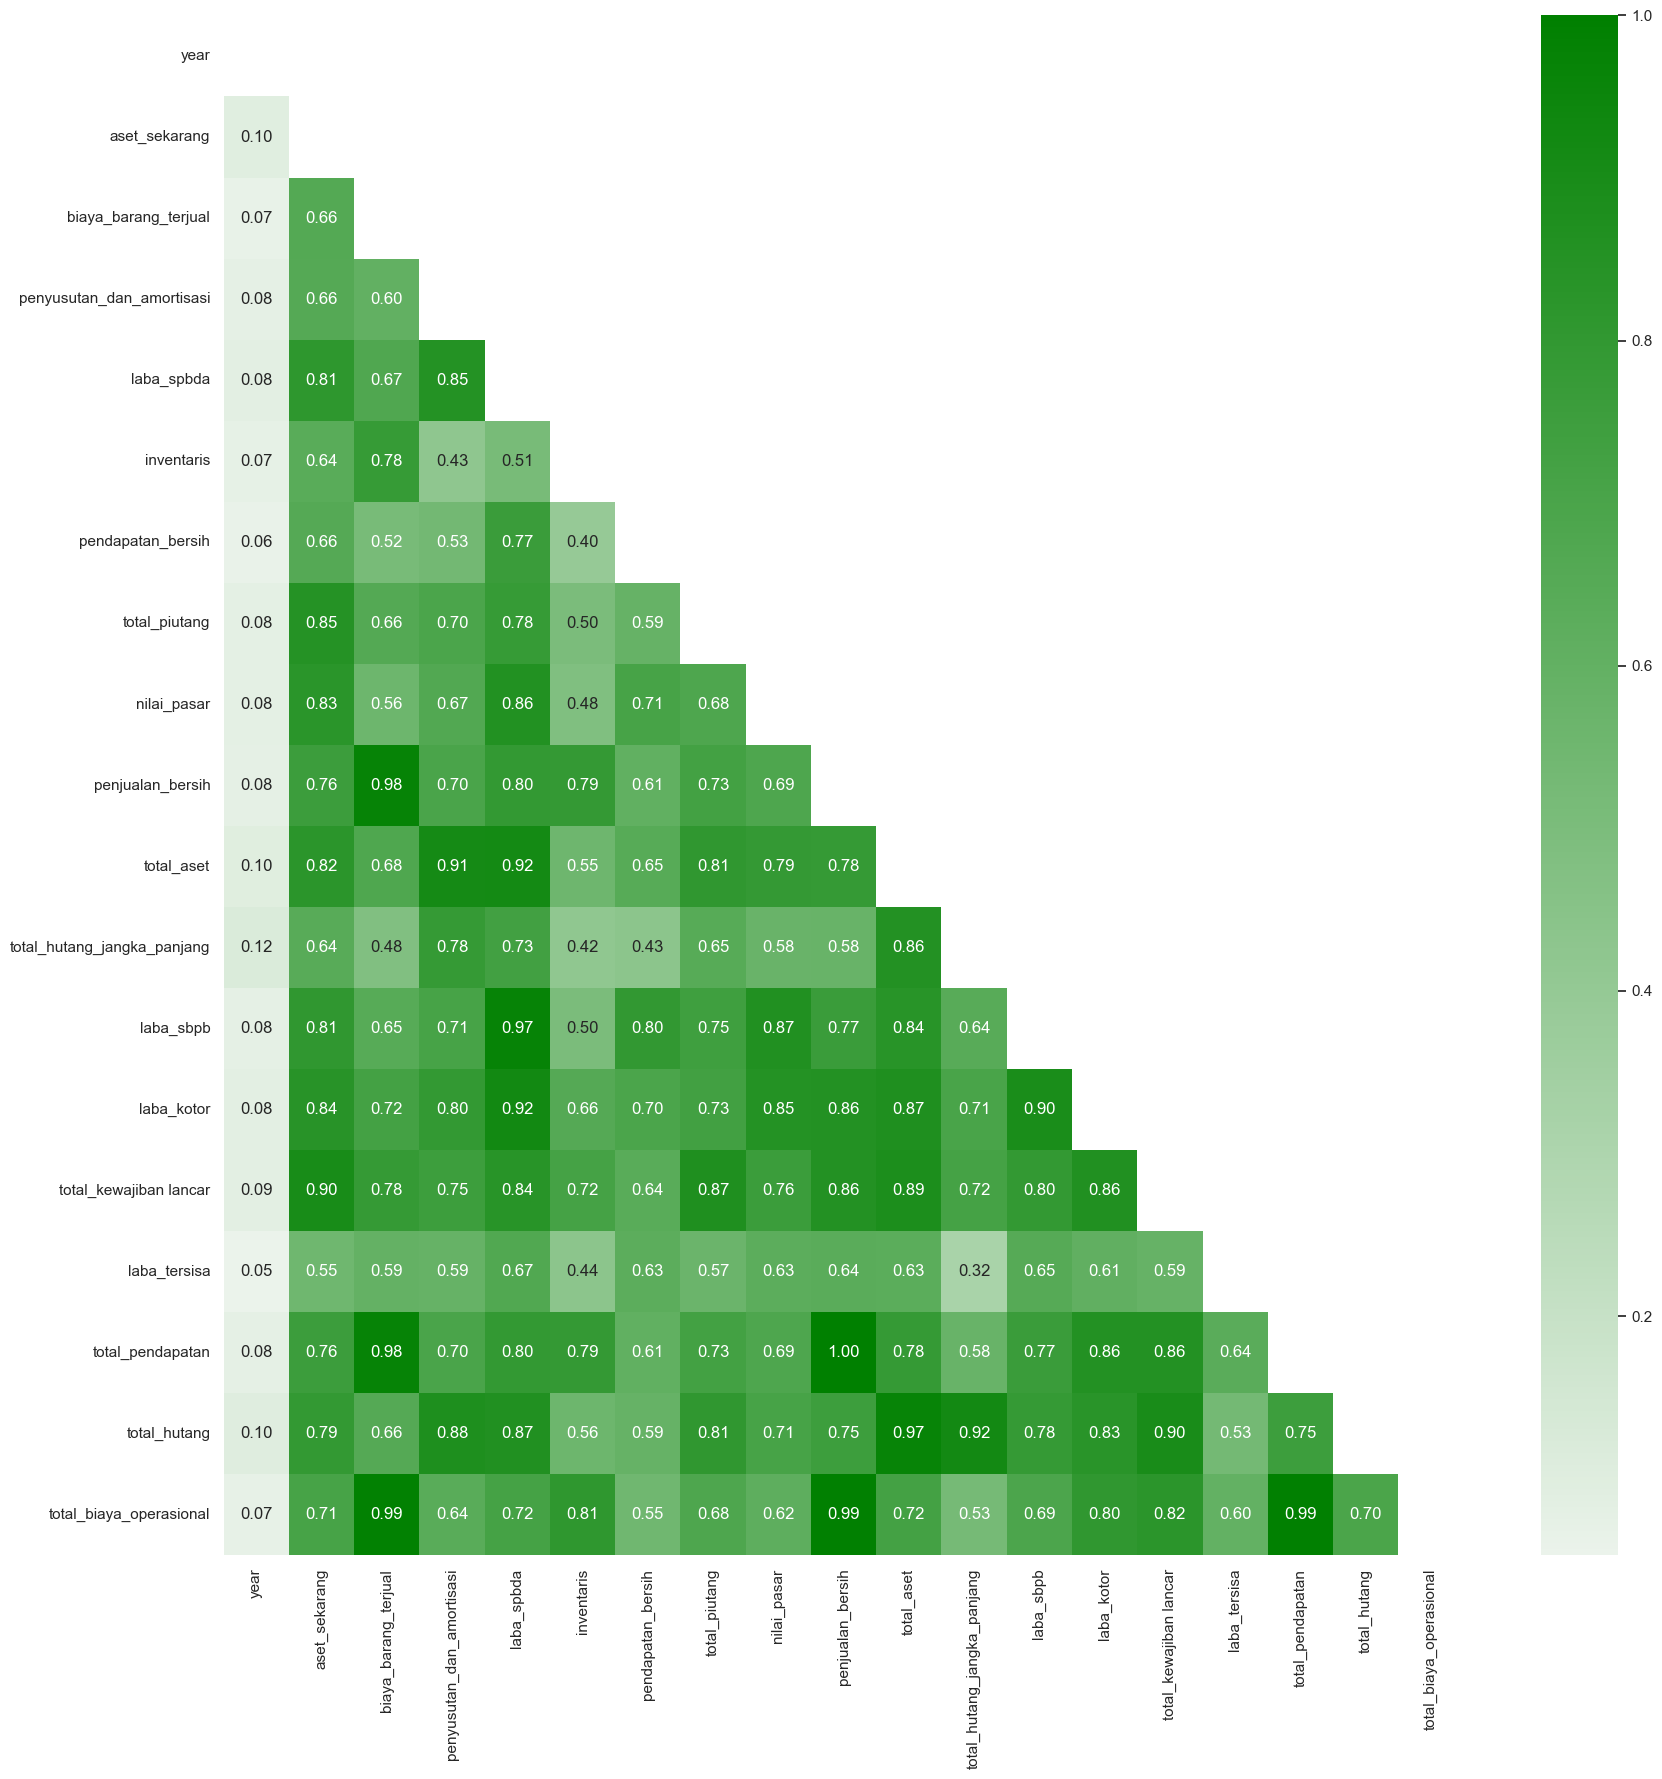

In [31]:
# viz
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.set_style("white")
cmap = sns.light_palette("green", as_cmap=True)

mask = np.triu(np.ones_like(X.corr(), dtype=bool))

sns.heatmap(X.corr(),
            annot=True,
            cmap=cmap,
            fmt='.2f',
            mask=mask)

plt.show()

#### Multicollinearity
Ternyata cukup banyak sekali fitur-fitur yang korelasinya tinggi seperti > 0.9. Disini aku memutuskan untuk tidak menggunakan fitur-fitur tersebut karena kemungkinan adanya multikorelasi.

Multikorelasi terjadi ketika ada korelasi tinggi antara dua atau lebih variabel independen dalam model regresi. Sehingga hal ini akan menyebabkan beberapa masalah:
- koefisien regresi menjadi tidak stabil
- sulit untuk menentukan pengaruh individual dari masing-masing variabel independen terhadap variabel dependen
- dapat mengurangi efisiensi model regresi, karena variabel yang berkorelasi tinggi dapat menyediakan informasi yang redundan atau tidak berguna dalam memprediksi variabel dependen.

Solusinya adalah menggunakan fitur yang korelasinya tidak terlalu tinggi.

In [32]:
threshold      = 0.95
korelasi_fitur = set()

for i in range(len(corr.columns)):
    
    for j in range(i):
        
        if abs(corr.iloc[i, j]) >= threshold:
            nama_fitur = corr.columns[i]
            korelasi_fitur.add(nama_fitur)

print('Daftar Korelasi > 0.95:', korelasi_fitur)

Daftar Korelasi > 0.95: {'penjualan_bersih', 'total_hutang', 'total_pendapatan', 'total_biaya_operasional', 'laba_sbpb'}


In [33]:
# update X

X = X.drop(korelasi_fitur, axis=1)

In [34]:
X.columns

Index(['year', 'aset_sekarang', 'biaya_barang_terjual',
       'penyusutan_dan_amortisasi', 'laba_spbda', 'inventaris',
       'pendapatan_bersih', 'total_piutang', 'nilai_pasar', 'total_aset',
       'total_hutang_jangka_panjang', 'laba_kotor', 'total_kewajiban lancar',
       'laba_tersisa'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

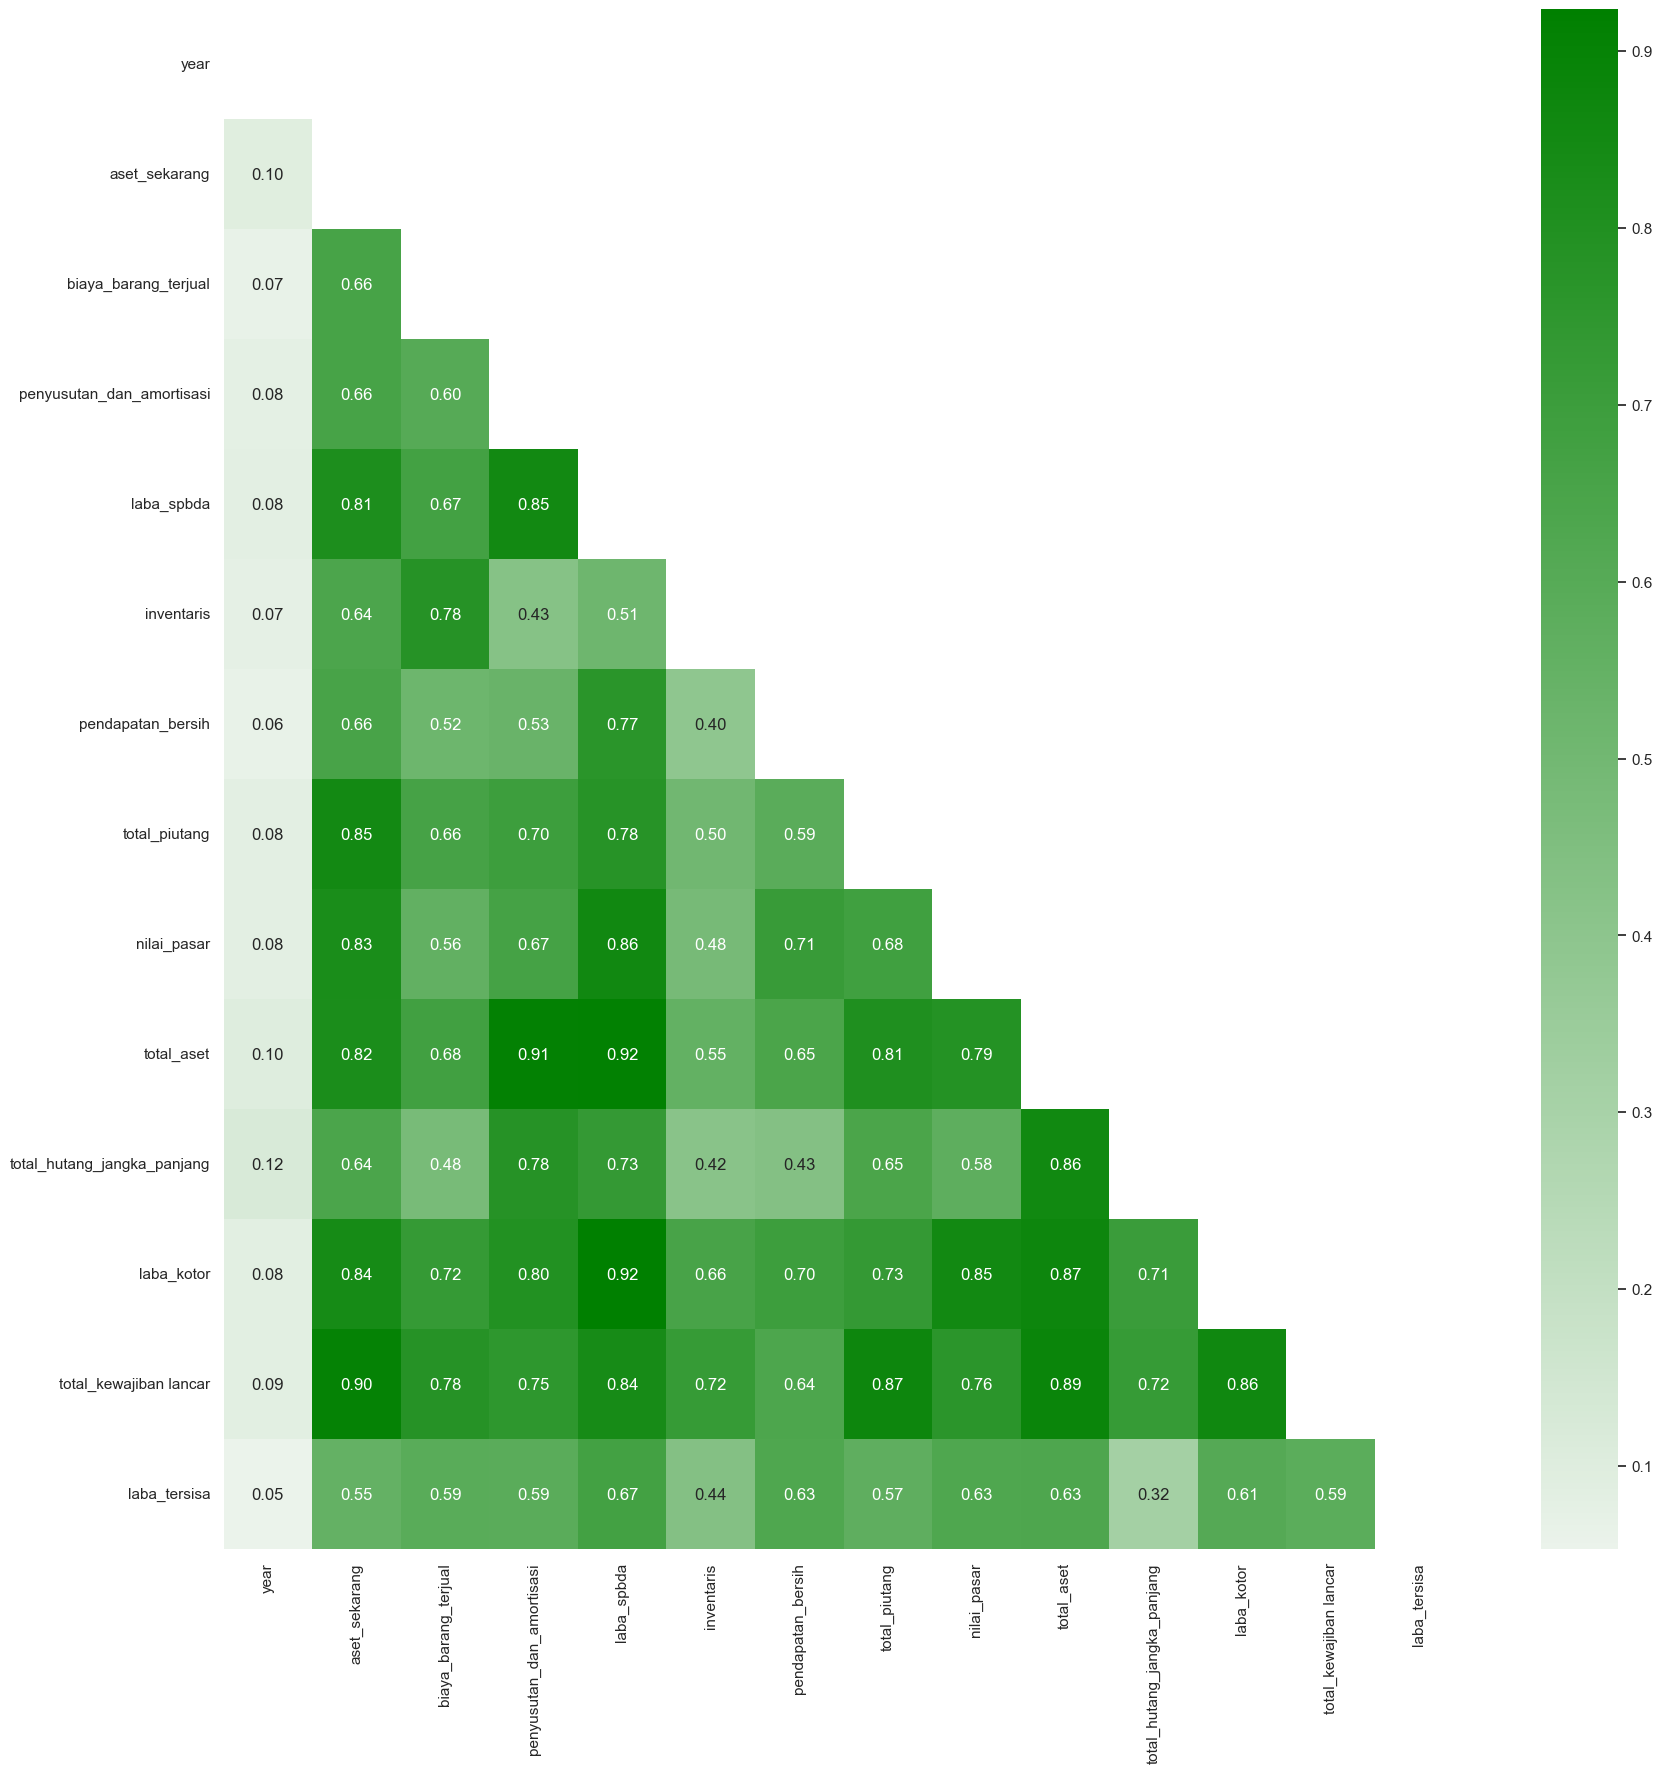

In [35]:
# viz
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
sns.set_style("white")
cmap = sns.light_palette("green", as_cmap=True)

mask = np.triu(np.ones_like(X.corr(), dtype=bool))

sns.heatmap(X.corr(),
            annot=True,
            cmap=cmap,
            fmt='.2f',
            mask=mask)

plt.show()

In [36]:
data_corr = X.copy()

#### 10 fitur yang memiliki nilai p < 0.05.
ingin memilih fitur-fitur yang memberikan bukti statistik yang cukup kuat untuk menolak hipotesis nol, dengan pernyataan bahwa tidak ada hubungan antara fitur independen dengan variabel target dengan mengunakan KBest 

In [37]:
selector  = SelectKBest(score_func=f_classif, k=10)
selector  = selector.fit(data_corr, y)

df_scores = pd.DataFrame({'Feature': data_corr.columns,
                         'Score': selector.scores_,
                         'p-value': (selector.pvalues_).round(4)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

<IPython.core.display.Javascript object>

,Feature,Score,p-value
0,year,550.278882,0.0000
6,pendapatan_bersih,110.131111,0.0000
8,nilai_pasar,107.913912,0.0000
1,aset_sekarang,83.908240,0.0000
4,laba_spbda,78.432225,0.0000
11,laba_kotor,76.689025,0.0000
7,total_piutang,74.617182,0.0000
13,laba_tersisa,67.121973,0.0000
9,total_aset,48.474546,0.0000
5,inventaris,47.621509,0.0000


Wahh sepertinya fitur-fitur tersebut sangatlah berkorelasi bahkan ketika sudah didrop fitur yang multikorelasi 😅😅. Hal ini berarti dataset tersebut sudah diolah dengan baik jika dilihat dari segi Data Pipeline 😮

In [38]:
y.dtypes

bankrupt    int64
dtype: object

In [39]:
t_ordinal = OrdinalEncoder()

encode_target = y.copy()
t_ordinal.fit(encode_target[['bankrupt']])
encode_target[['bankrupt']] = t_ordinal.transform(encode_target[['bankrupt']])
encode_target = encode_target['bankrupt']

In [40]:
y = pd.DataFrame(encode_target).sort_index()
y

<IPython.core.display.Javascript object>

,bankrupt
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
78677,0.0
78678,0.0
78679,0.0
78680,0.0


In [42]:
X.to_csv('C:/Users/ASUS/kode/Projek/bankrupt/X.csv', index=False)
y.to_csv('C:/Users/ASUS/kode/Projek/bankrupt/y.csv', index=False)